### NOTEBOOK RUNTIME(Runtime->Run all/Ctrl+F9) : Around 6 minutes 30 seconds (390 seconds)

## Abstract



Counter-Strike: Global Offensive (CS:GO) is a multiplayer tactical first-person shooter developed by Valve and Hidden Path Entertainment. Counter-Strike: Global Offensive is a tactical shooter that emphasizes teamwork, strategy, and gunplay. Winning a game requires extensive teamwork, as well as personal economy management.

CS:GO’s primary game mode for its casual and competitive queues is bomb defusal. Each round, a team of terrorists must take the bomb and plant it on one of two bomb sites. The team of counter-terrorists are tasked with stopping them from planting, or defusing the bomb after it’s planted. If the bomb explodes, or if the terrorists kill all the CTs, then they win the round. If the CTs kill all the terrorists before the bomb is planted, or defuse the bomb after its planted, then they win. A CT can defuse the bomb even if other terrorists are still alive. If the bomb isn’t planted and players from both sides are alive at the end of a round, the CTs win that round.

At the beginning of the round, each player has to buy their equipment, consisting of weapons, armor, and grenades. There are five categories of purchasable weaponry: rifles, submachine guns, "heavy" weaponry (light machine guns and shotguns), pistols, and grenades. Players can choose between full or half armor, a handful of grenades, and several weapons. Players will earn money each round, and can earn additional money for killing players and fulfilling objectives like planting or defusing the bomb.

The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset

• Which independent variables are useful to predict a target (dependent variable)?

• Which independent variables have missing data? How much

• Do the training and test sets have the same data?

• In the predictor variables independent of all the other predictor variables?

• Which predictor variables are the most important?

• Do the ranges of the predictor variables make sense?

• What are the distributions of the predictor variables?

## Import all the packages that we may need.

In [4]:
#importing the libraries
from math import ceil
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

## **About this Dataset**: 



The dataset consists of round snapshots from about 700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot has been recorded every 20 seconds until the round is decided. Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411. Snapshots are i.i.d and should be treated as individual data points, not as part of a match.

## Variable Definition Key

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




time_left - The time left in the current round.

ct_score - The current score of the Counter-Terrorist team.

t_score - The current score of the Terrorist team.

map - The map the round is being played on. E.g. de_dust2, de_inferno and de_overpass

bomb_planted - If the bomb has been planted or not. False = No, True = Yes

ct_health - The total health of all Counter-Terrorist players. Player health in range 0-100.

t_health - The total health of all Terrorist players. Player health in range 0-100.

ct_armor - The total armor of all Counter-Terrorist players.

t_armor - The total armor of all Terrorist players.

ct_money - The total bankroll of all Counter-Terrorist players. Amount in USD.

t_money - The total bankroll of all Terrorist players. Amount in USD.

ct_helmets - Number of helmets on the Counter-Terrorist team.

t_helmets - Number of helmets on the Terrorist team.

ct_defuse_kits - Number of defuse kits on the Counter-Terrorist team.

ct_players_alive - Number of alive players on the Counter-Terrorist team. Range 0 to 5.

t_players_alive - Number of alive players on the Terrorist team. Range 0 to 5.

ct_weapon_X - Weapon X count on Counter-Terrorist team. E.g. Ak47, Deagle and UMP45.

t_weapon_X - Weapon X count on Terrorist team. E.g. Ak47, Deagle and UMP45.

ct_grenade_X - Grenade X count on Counter-Terrorist team. E.g. HeGrenade, Flashbang.

t_grenade_X - Grenade X count on Terrorist team. E.g. HeGrenade, Flashbang.

round_winner - Winner. CT = Counter-Terrorist, T = Terrorist

In [6]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/DS CSV/csgo_round_snapshots.csv")
data2=pd.read_csv("/content/drive/MyDrive/DS CSV/csgo_round_snapshots.csv")

data.name = "data"
data.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00         0        0  de_dust2         False        500       500   
1     156.03         0        0  de_dust2         False        500       500   
2      96.03         0        0  de_dust2         False        391       400   
3      76.03         0        0  de_dust2         False        391       400   
4     174.97         1        0  de_dust2         False        500       500   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0         0        0      4000  ...                    0   
1       400      300       600  ...                    0   
2       294      200       750  ...                    0   
3       294      200       750  ...                    0   
4       192        0     18350  ...                    0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                        0                       0   
1                        0                       2   
2                        0                       2   
3                        0                       0   
4                        0                       0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                        0                       0            CT  
1                        0                       0            CT  
2                        0                       0            CT  
3                        0                       0            CT  
4                        0                       0            CT  

[5 rows x 97 columns]

##What are the data types? (Only numeric and categorical)

In [7]:
#Data types of the columns present in the DataSet
data.dtypes

time_left                       float64
ct_score                          int64
t_score                           int64
map                              object
bomb_planted                       bool
ct_health                         int64
t_health                          int64
ct_armor                          int64
t_armor                           int64
ct_money                          int64
t_money                           int64
ct_helmets                        int64
t_helmets                         int64
ct_defuse_kits                    int64
ct_players_alive                  int64
t_players_alive                   int64
ct_weapon_ak47                    int64
t_weapon_ak47                     int64
ct_weapon_aug                     int64
t_weapon_aug                      int64
ct_weapon_awp                     int64
t_weapon_awp                      int64
ct_weapon_bizon                   int64
t_weapon_bizon                    int64
ct_weapon_cz75auto                int64


 ## Are there missing values?

In [8]:
# printing number of rows in each feature
data.count()

time_left                       122410
ct_score                        122410
t_score                         122410
map                             122410
bomb_planted                    122410
ct_health                       122410
t_health                        122410
ct_armor                        122410
t_armor                         122410
ct_money                        122410
t_money                         122410
ct_helmets                      122410
t_helmets                       122410
ct_defuse_kits                  122410
ct_players_alive                122410
t_players_alive                 122410
ct_weapon_ak47                  122410
t_weapon_ak47                   122410
ct_weapon_aug                   122410
t_weapon_aug                    122410
ct_weapon_awp                   122410
t_weapon_awp                    122410
ct_weapon_bizon                 122410
t_weapon_bizon                  122410
ct_weapon_cz75auto              122410
t_weapon_cz75auto        

In [9]:
#checking if the any data is missing
np.sum(data.isnull().sum())

0

In [10]:
# We need to check NaN values in dataset
data.isna().sum()

time_left                       0
ct_score                        0
t_score                         0
map                             0
bomb_planted                    0
ct_health                       0
t_health                        0
ct_armor                        0
t_armor                         0
ct_money                        0
t_money                         0
ct_helmets                      0
t_helmets                       0
ct_defuse_kits                  0
ct_players_alive                0
t_players_alive                 0
ct_weapon_ak47                  0
t_weapon_ak47                   0
ct_weapon_aug                   0
t_weapon_aug                    0
ct_weapon_awp                   0
t_weapon_awp                    0
ct_weapon_bizon                 0
t_weapon_bizon                  0
ct_weapon_cz75auto              0
t_weapon_cz75auto               0
ct_weapon_elite                 0
t_weapon_elite                  0
ct_weapon_famas                 0
t_weapon_famas

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

## Are there any duplicate values?

In [11]:
print(data.duplicated().value_counts()) 

False    117448
True       4962
dtype: int64


There are 4962 Duplicate entries in our Dataset, So we need to delete the duplicates for better understanding and predictions.

In [12]:
#Duplicates have been dropped 
data = data.drop_duplicates()
data2 = data2.drop_duplicates()

In [13]:
print(data.duplicated().value_counts()) 

False    117448
dtype: int64


## What are the distributions of the dependent variable?   

Understanding our dependent variable (or) output variable. 'round_winner' is a categorical variable with either CT or T as value.

Suggesting if the round is won by CT or T

In [14]:
# Lets count numbers of row for 'round_winner' type
data.groupby("round_winner").size()

round_winner
CT    57507
T     59941
dtype: int64

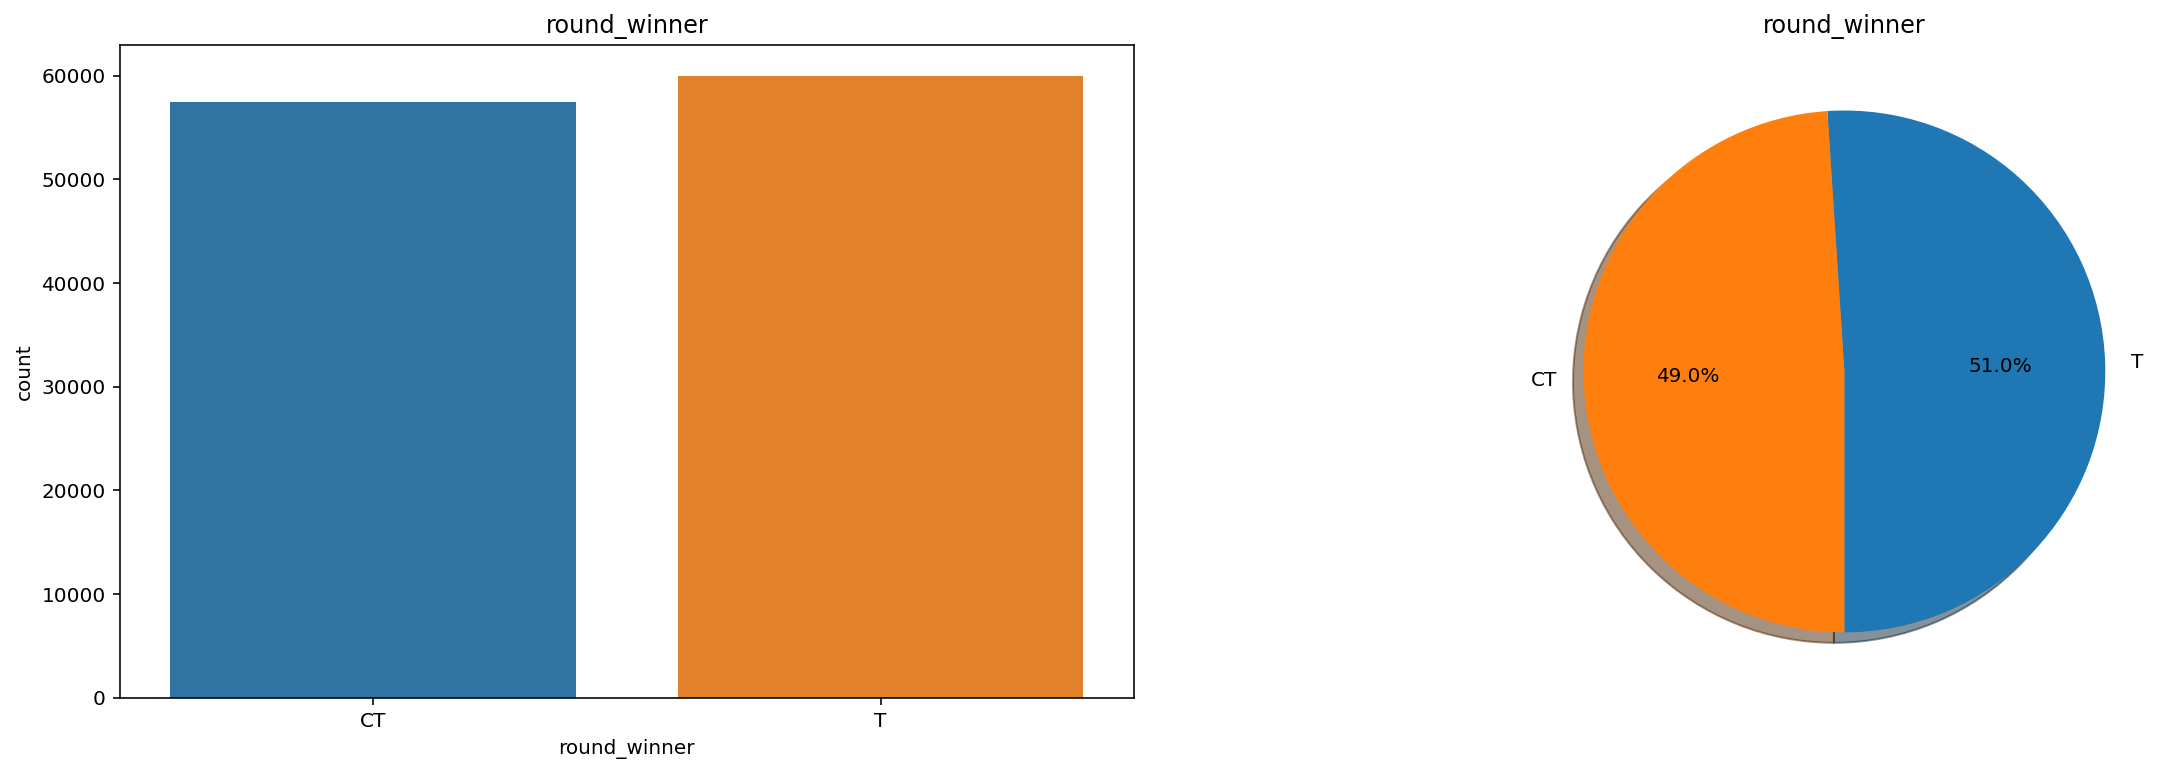

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='round_winner',data=data)
plt.title("round_winner")
plt.subplot(1,2,2)
labels =data['round_winner'].value_counts(sort = True).index
sizes = data['round_winner'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('round_winner',size = 12)
plt.show()

## Converting categorical data of some features into Numerical data

Changing the values of round_winner from CT or T to 0 or 1

In [16]:
encoder = LabelEncoder()
data['round_winner'] = encoder.fit_transform(data['round_winner'])
winner_mappings = {index: label for index, label in enumerate(encoder.classes_)}

Assigning each map an integer value,

In [17]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mappings = {index: label for index, label in enumerate(encoder.classes_)}

In [18]:
map_mappings

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

Changing the values of bomb_planted from False or True to 0 or 1

In [19]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

## What are the likely distributions of the numeric variables?

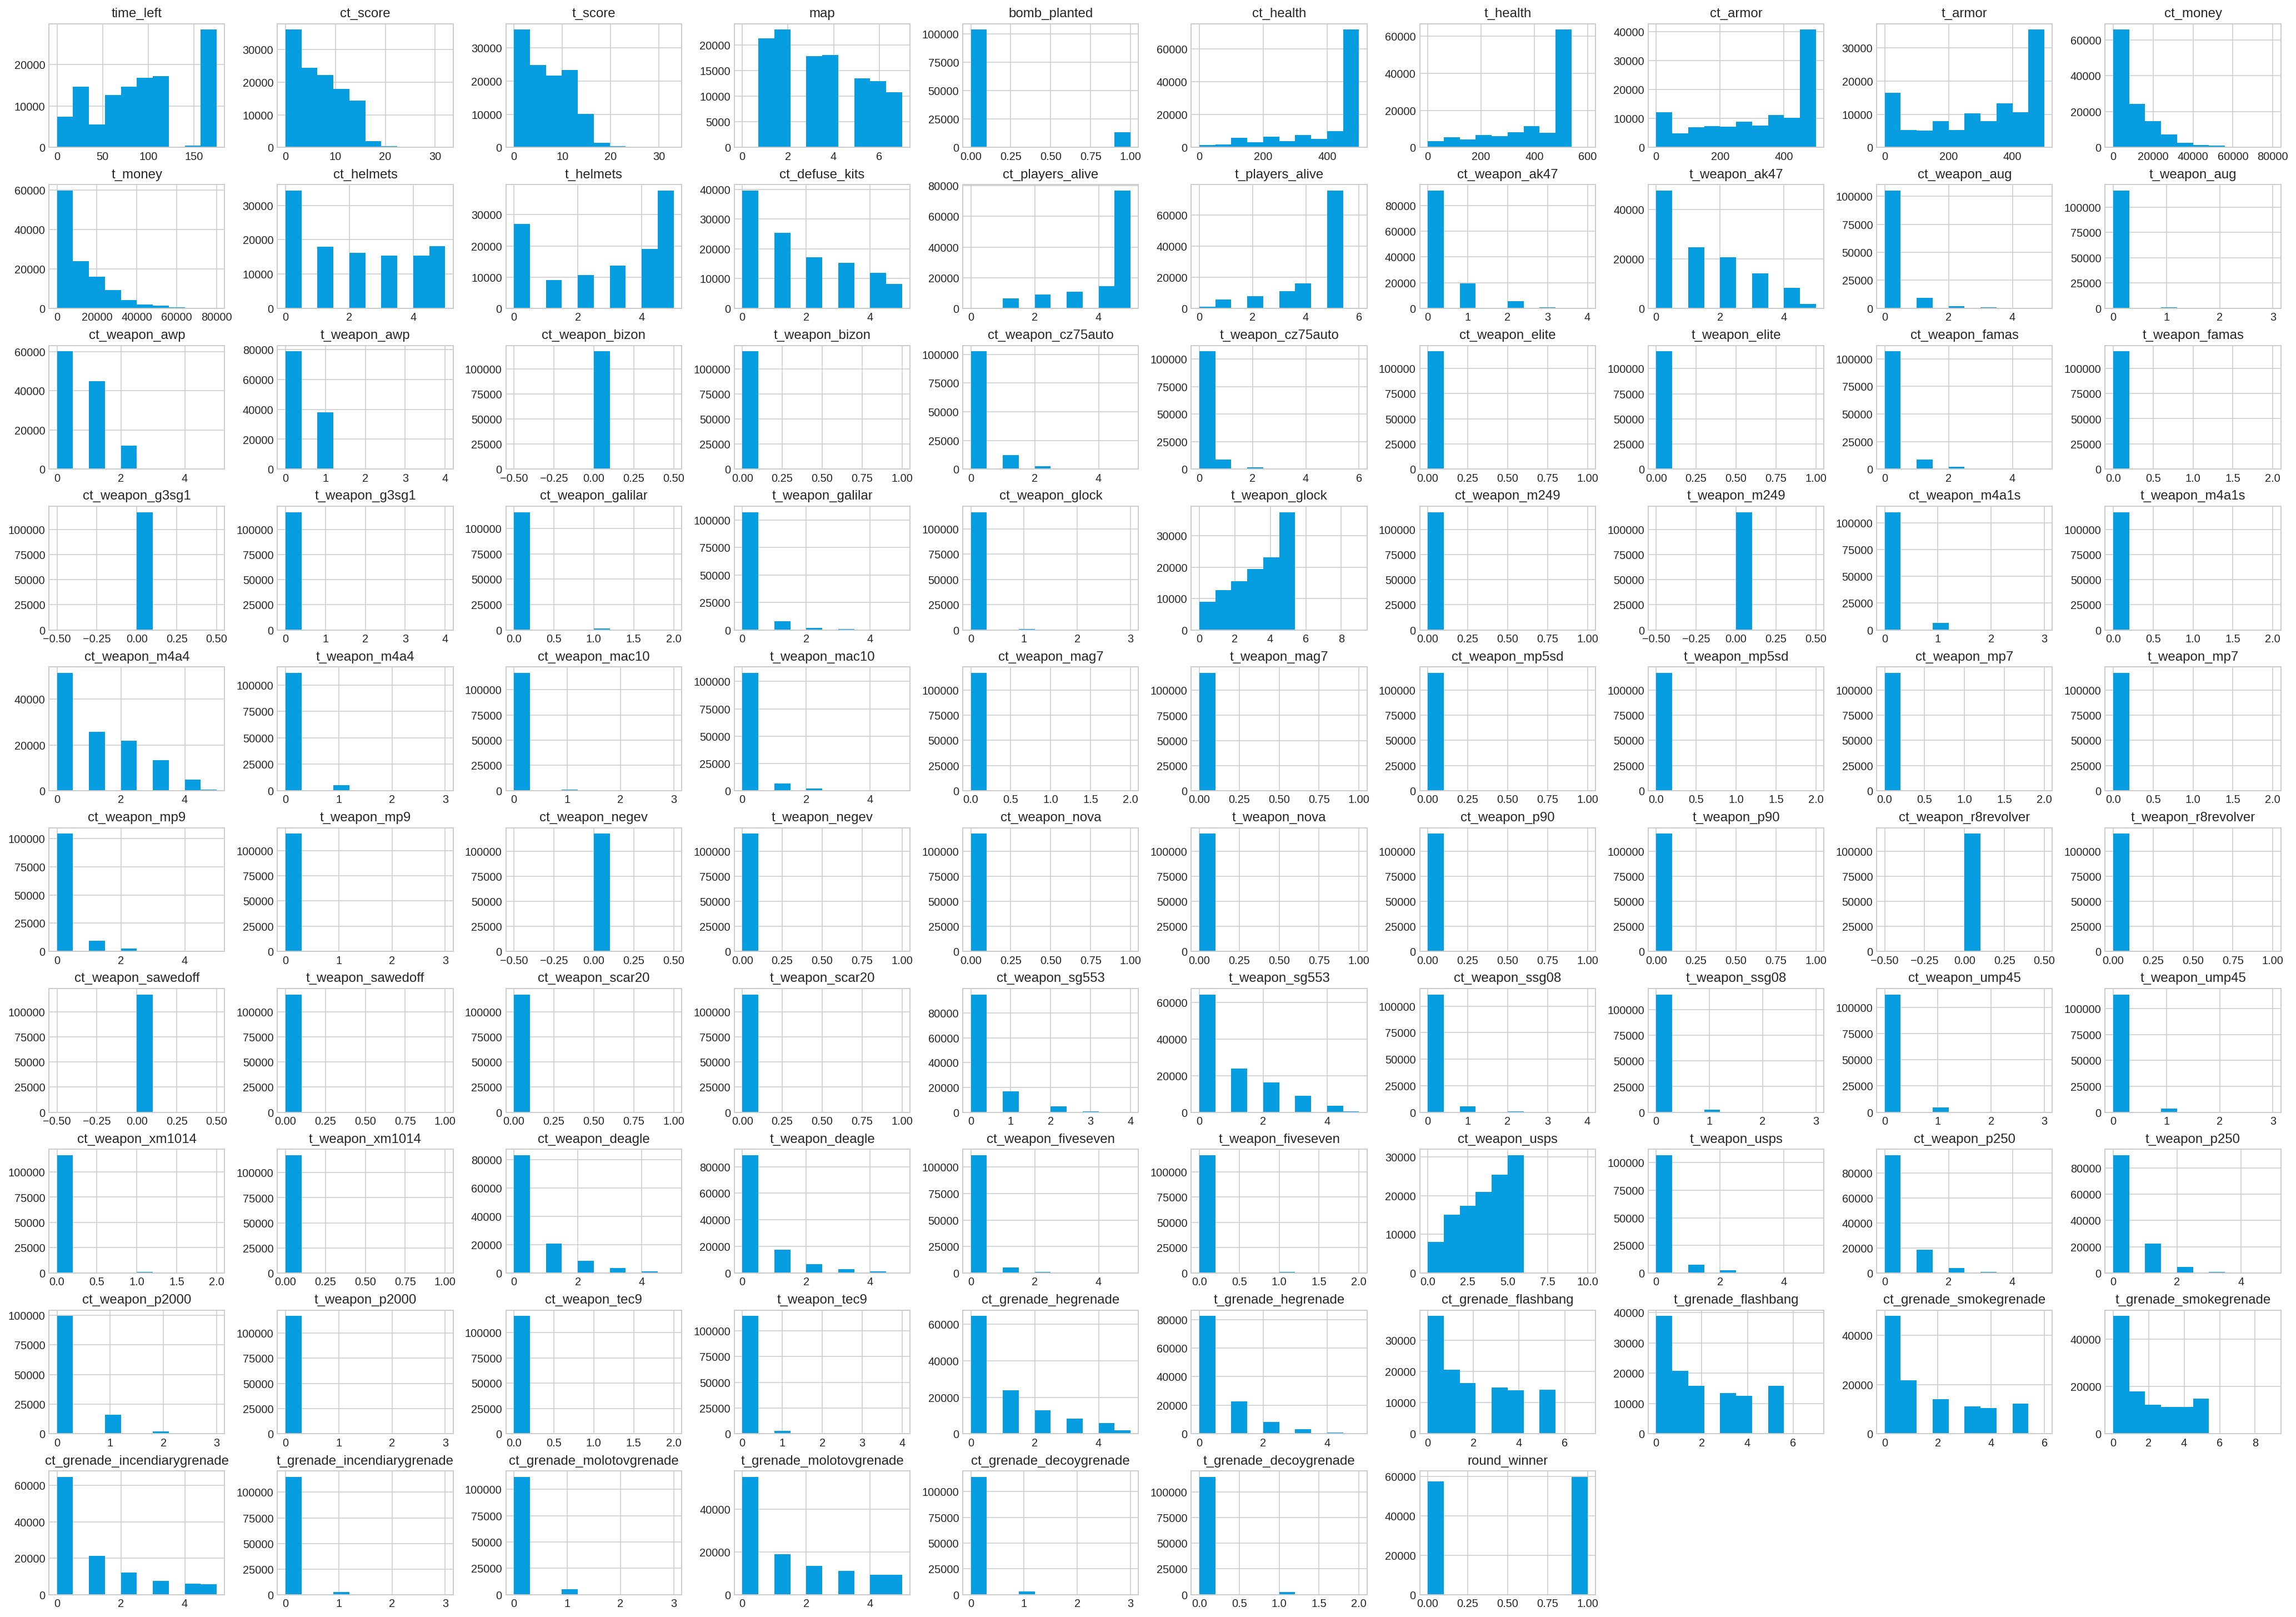

In [20]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=10, figsize=(36,26), color='#069EE1')
plt.show();

<Figure size 576x360 with 0 Axes>

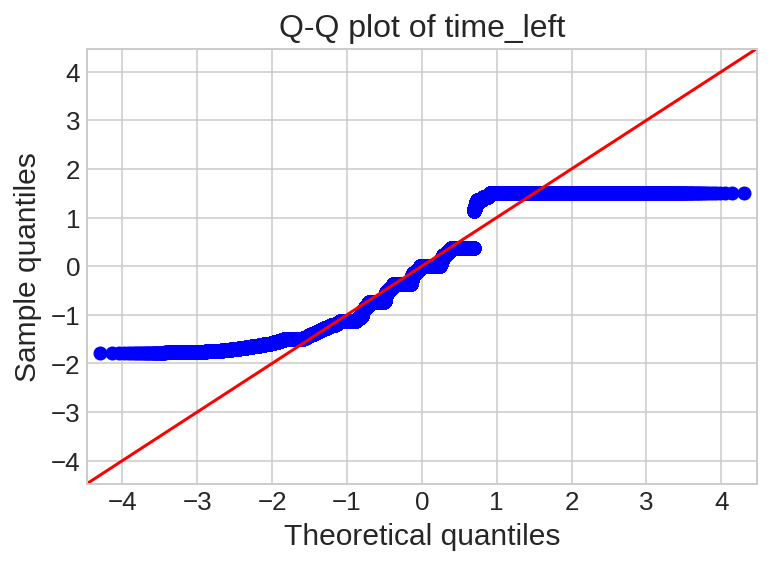

<Figure size 576x360 with 0 Axes>

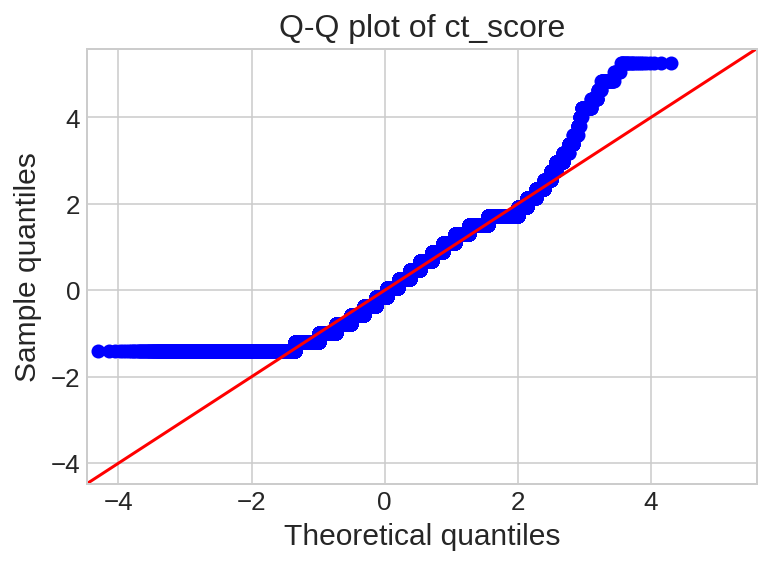

<Figure size 576x360 with 0 Axes>

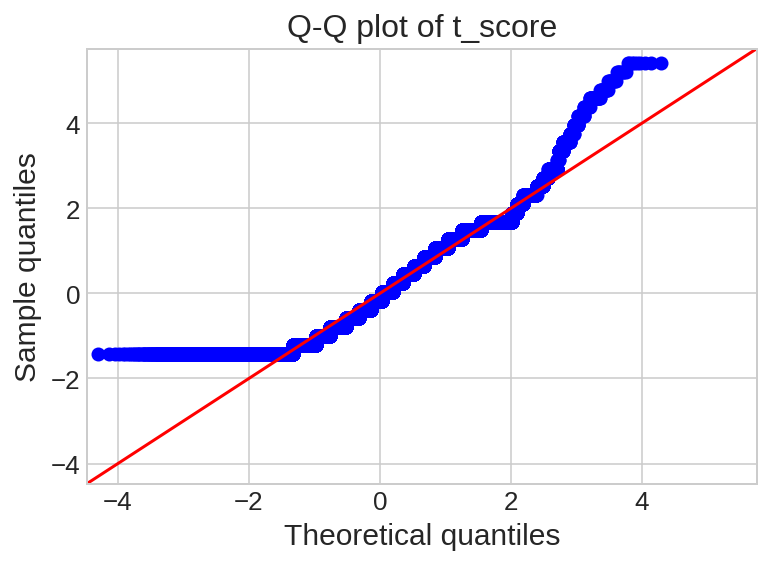

<Figure size 576x360 with 0 Axes>

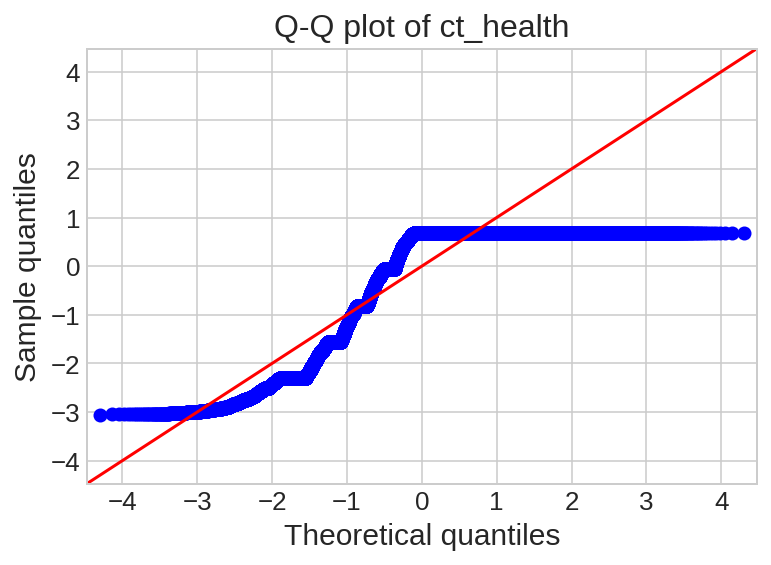

<Figure size 576x360 with 0 Axes>

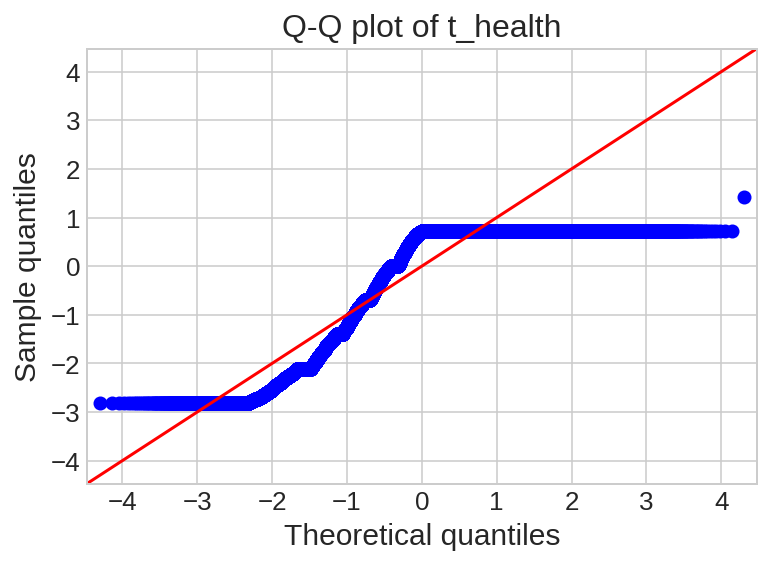

<Figure size 576x360 with 0 Axes>

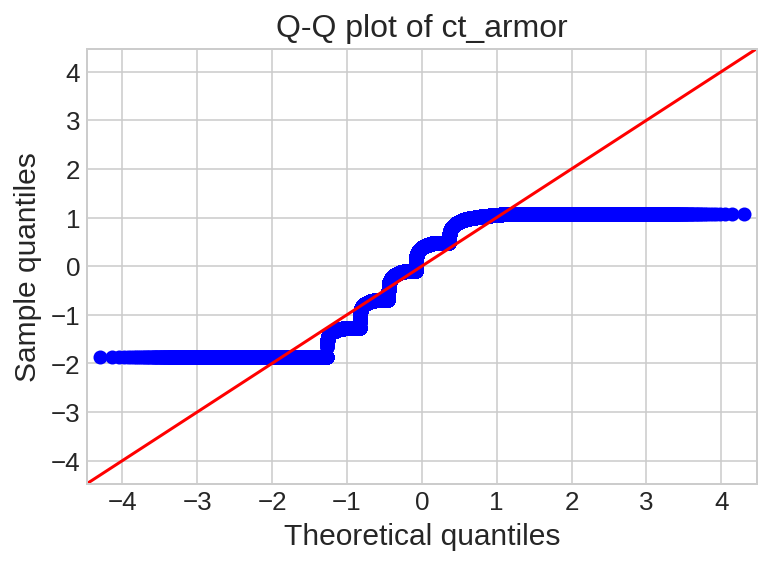

<Figure size 576x360 with 0 Axes>

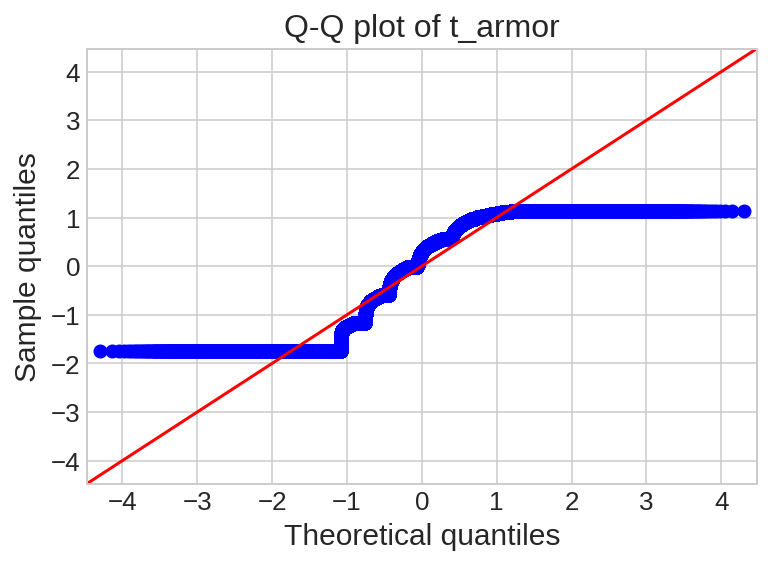

<Figure size 576x360 with 0 Axes>

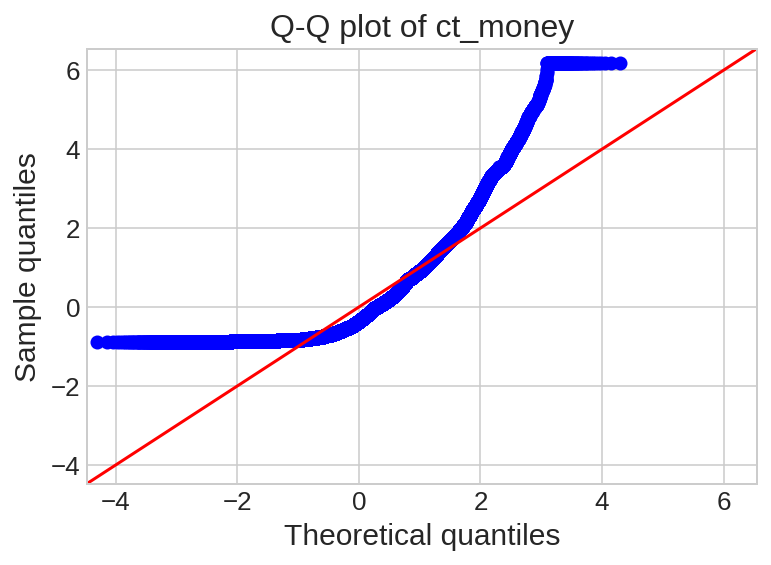

<Figure size 576x360 with 0 Axes>

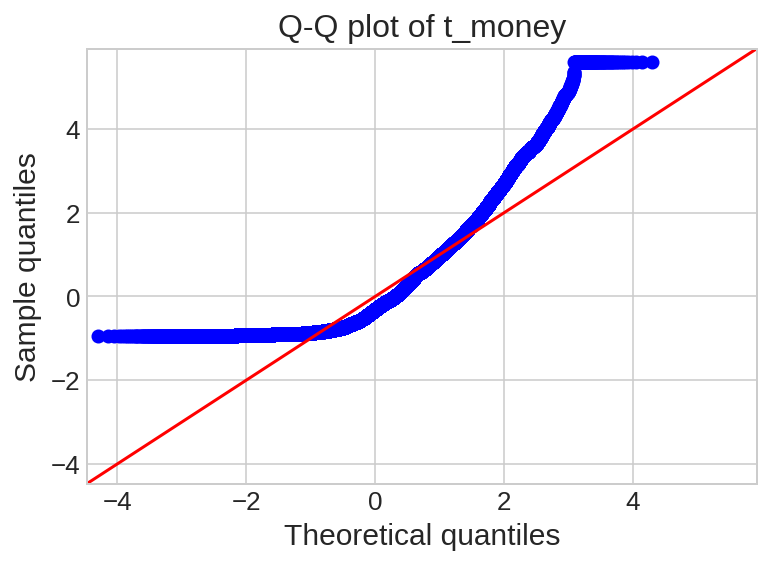

<Figure size 576x360 with 0 Axes>

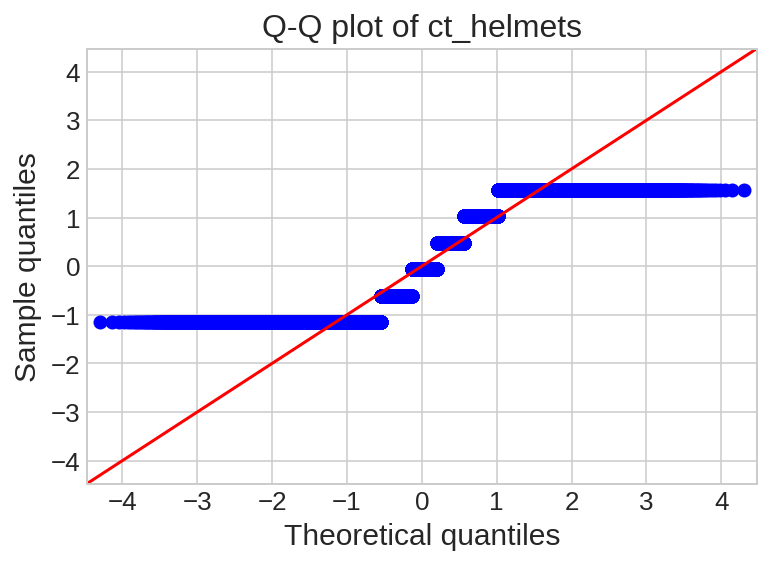

<Figure size 576x360 with 0 Axes>

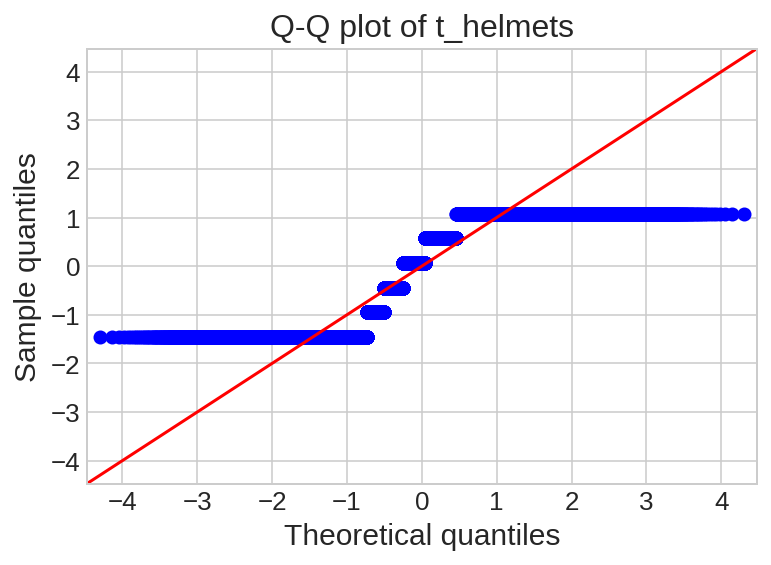

<Figure size 576x360 with 0 Axes>

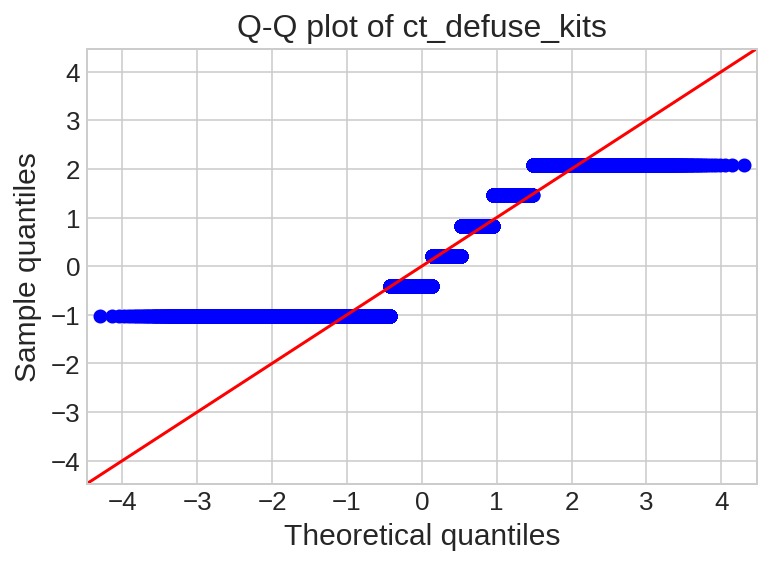

<Figure size 576x360 with 0 Axes>

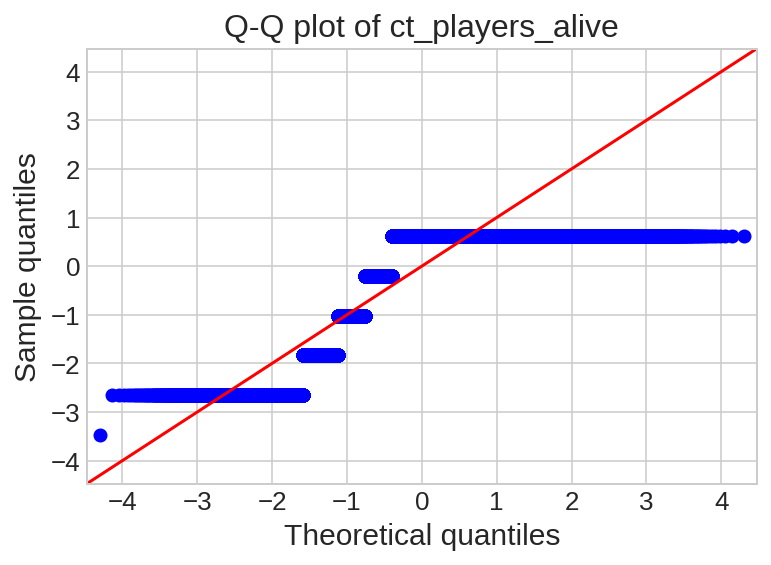

<Figure size 576x360 with 0 Axes>

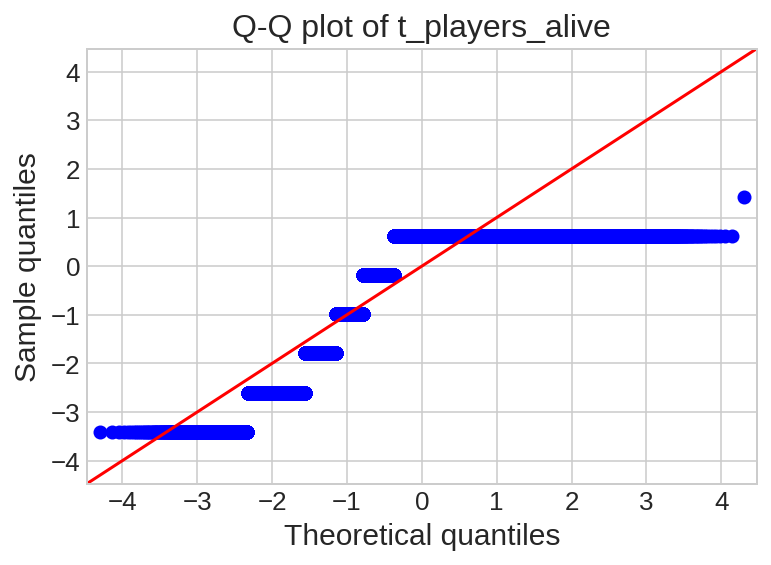

<Figure size 576x360 with 0 Axes>

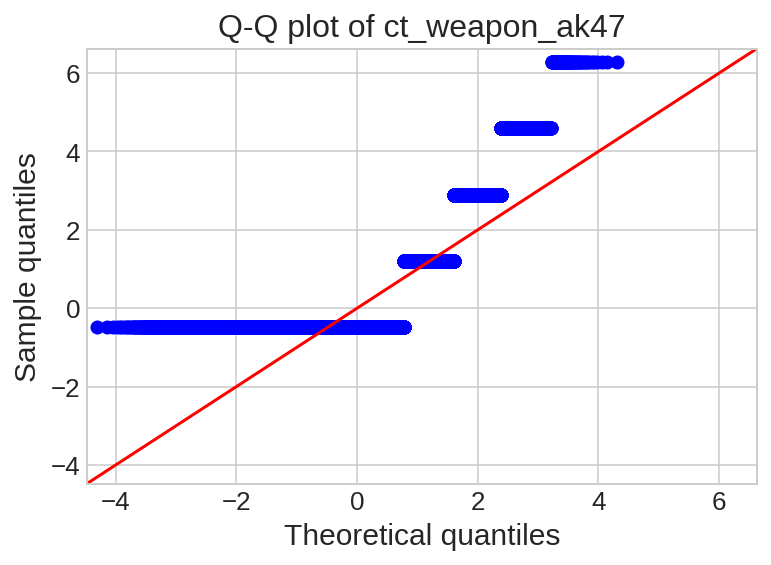

<Figure size 576x360 with 0 Axes>

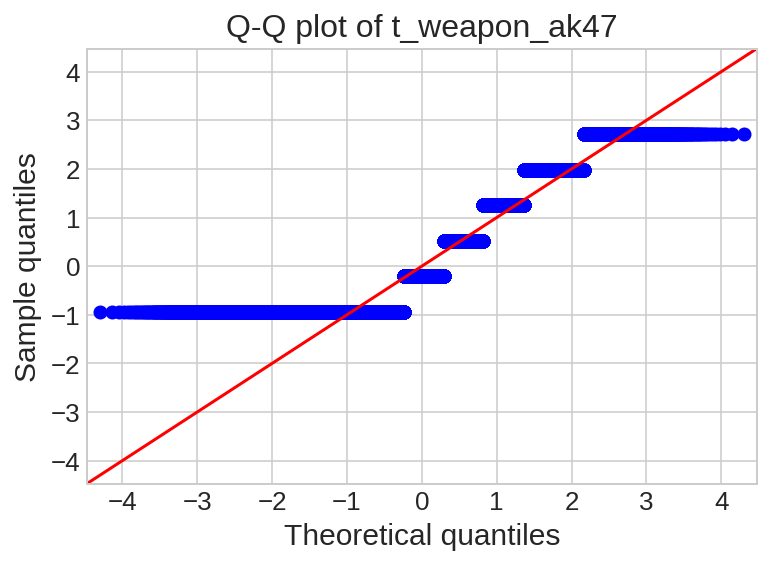

<Figure size 576x360 with 0 Axes>

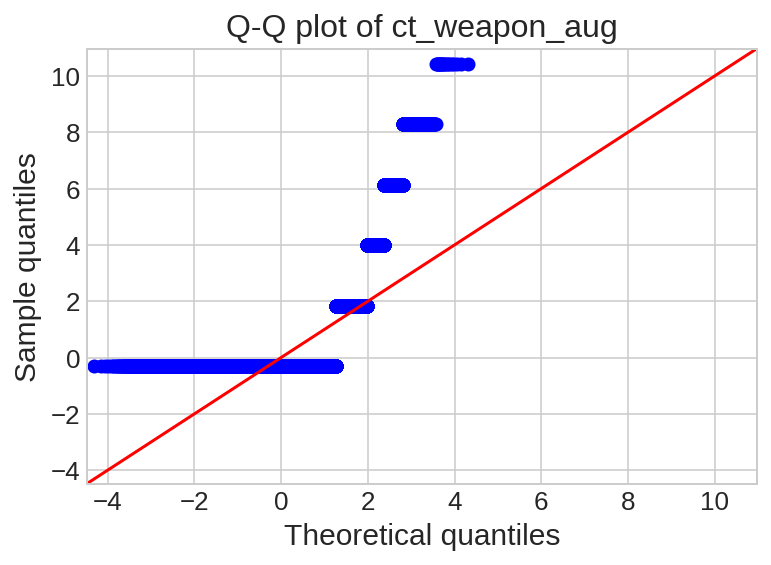

<Figure size 576x360 with 0 Axes>

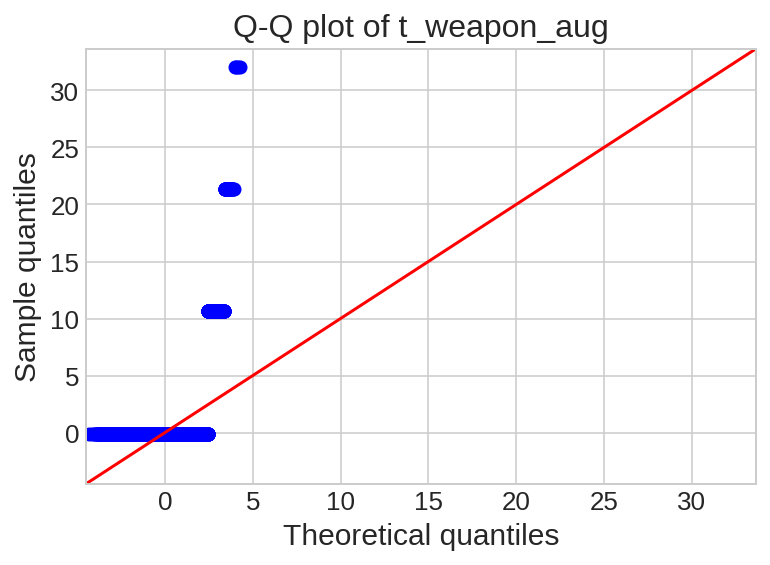

<Figure size 576x360 with 0 Axes>

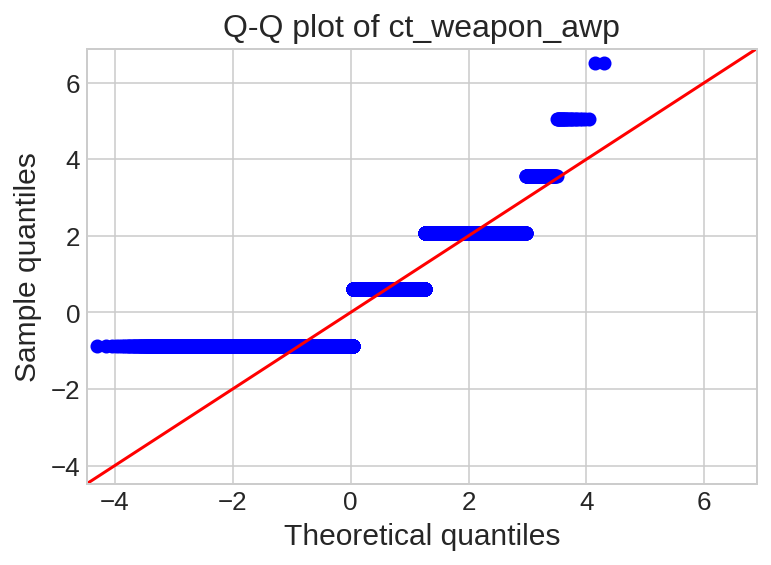

<Figure size 576x360 with 0 Axes>

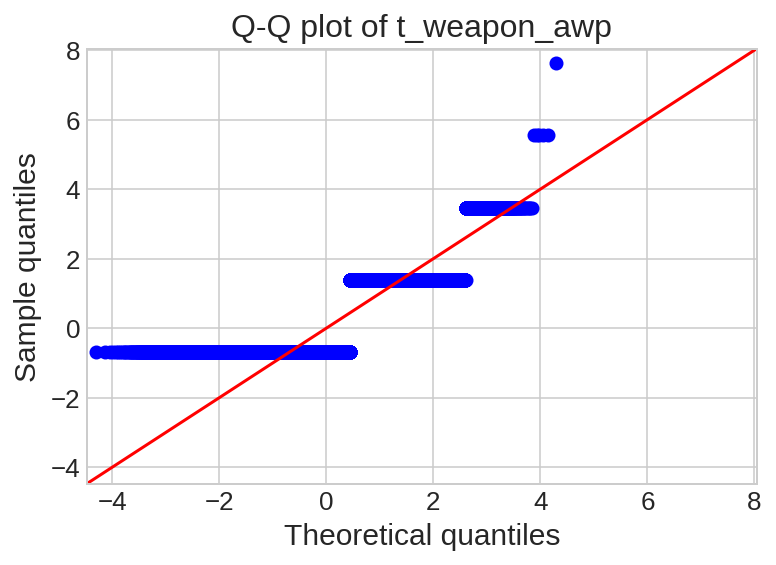

<Figure size 576x360 with 0 Axes>

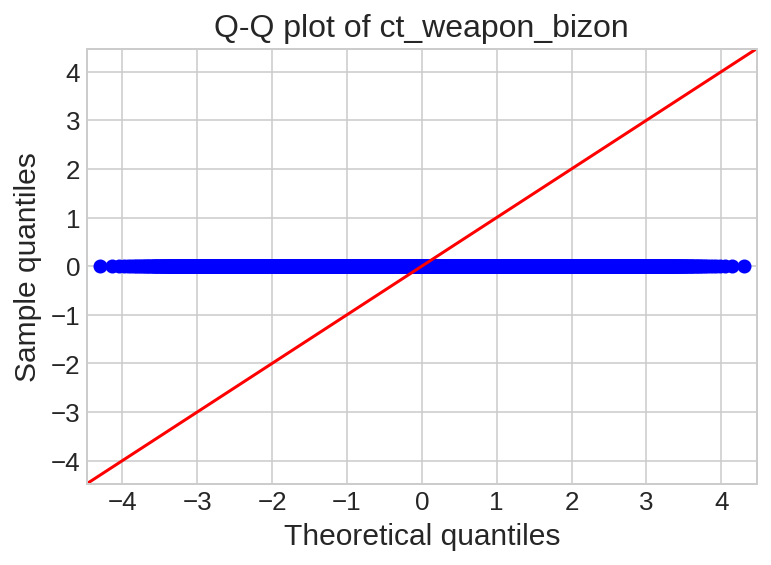

<Figure size 576x360 with 0 Axes>

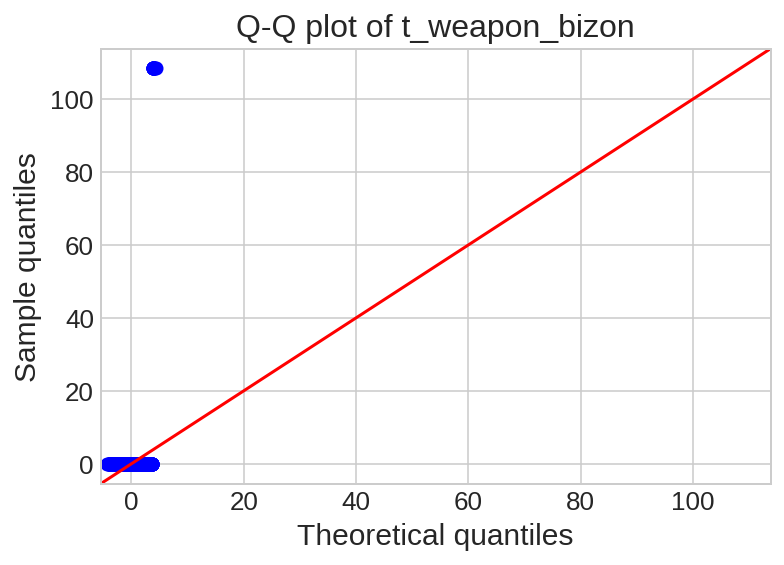

<Figure size 576x360 with 0 Axes>

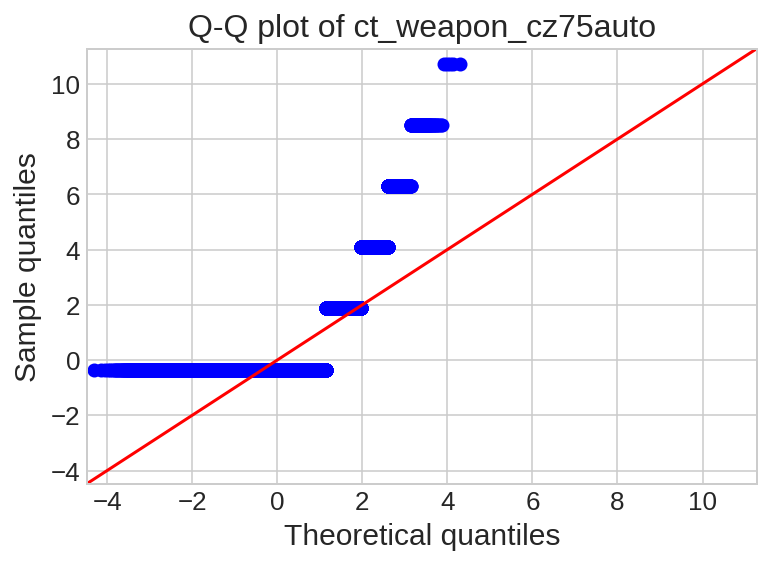

<Figure size 576x360 with 0 Axes>

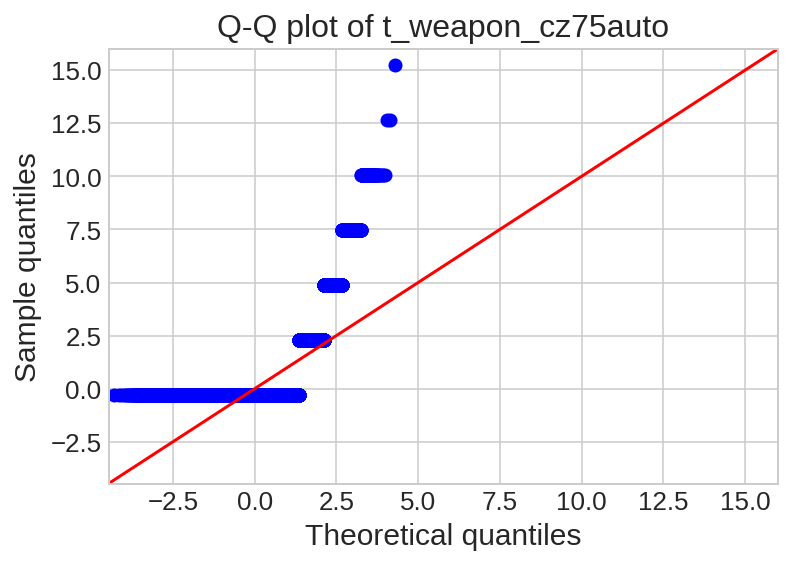

<Figure size 576x360 with 0 Axes>

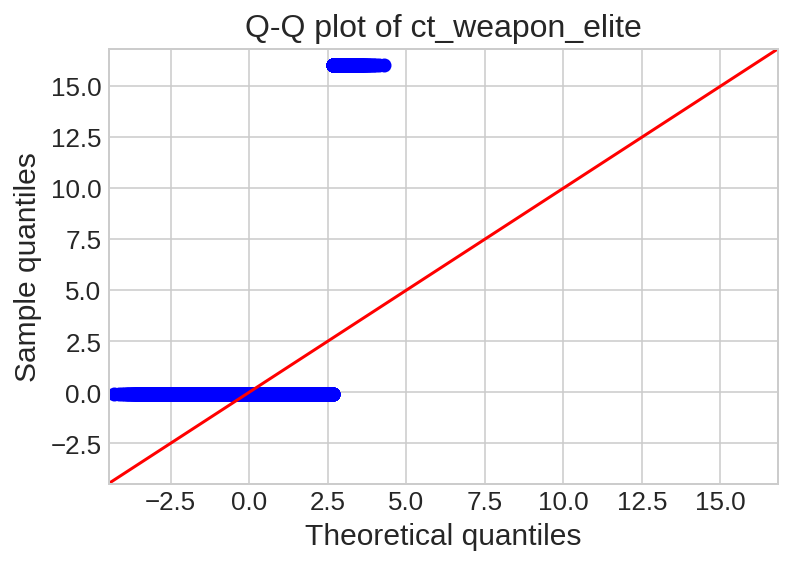

<Figure size 576x360 with 0 Axes>

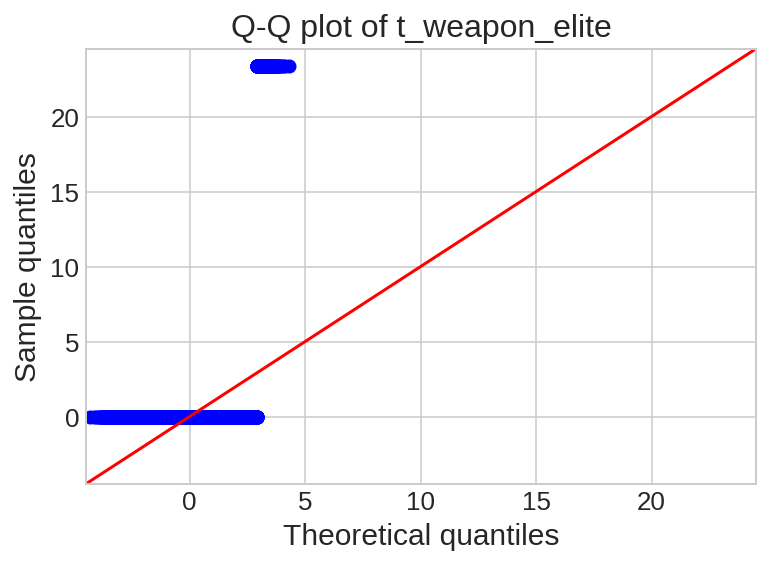

<Figure size 576x360 with 0 Axes>

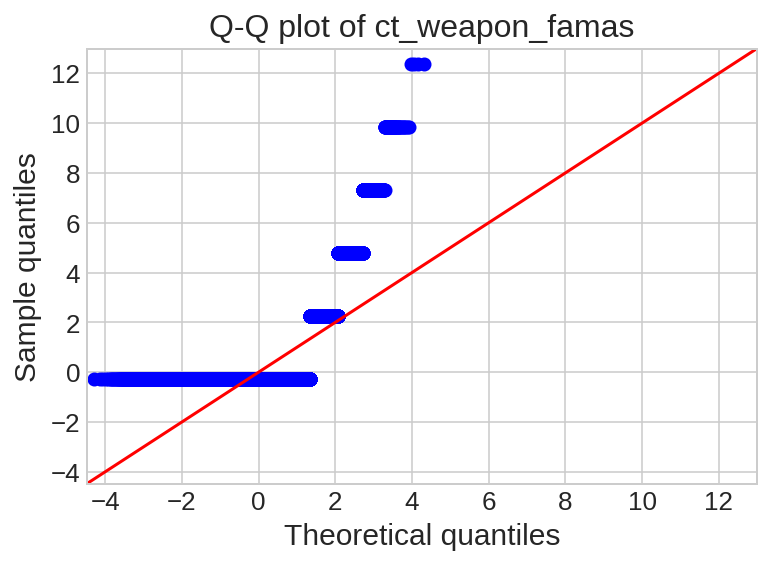

<Figure size 576x360 with 0 Axes>

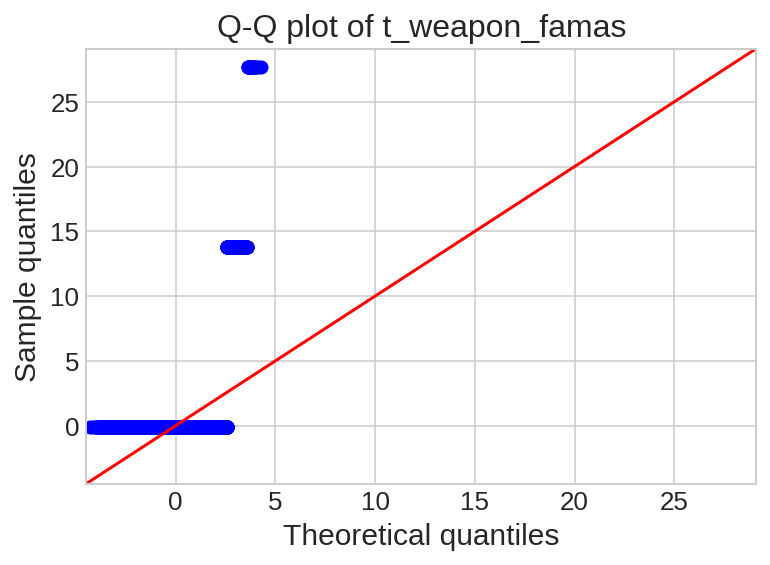

<Figure size 576x360 with 0 Axes>

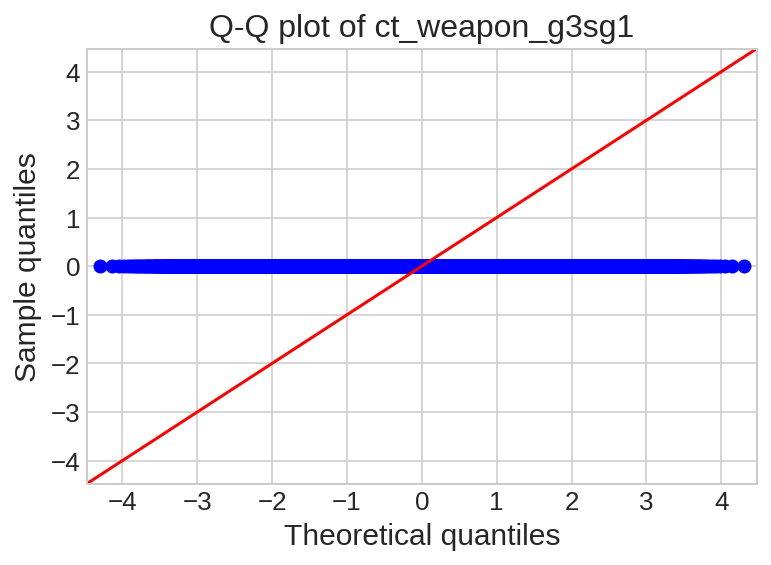

<Figure size 576x360 with 0 Axes>

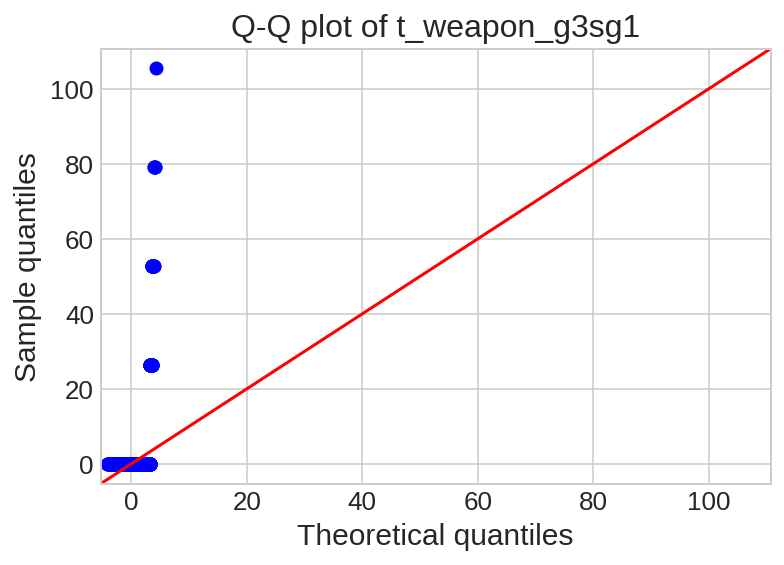

<Figure size 576x360 with 0 Axes>

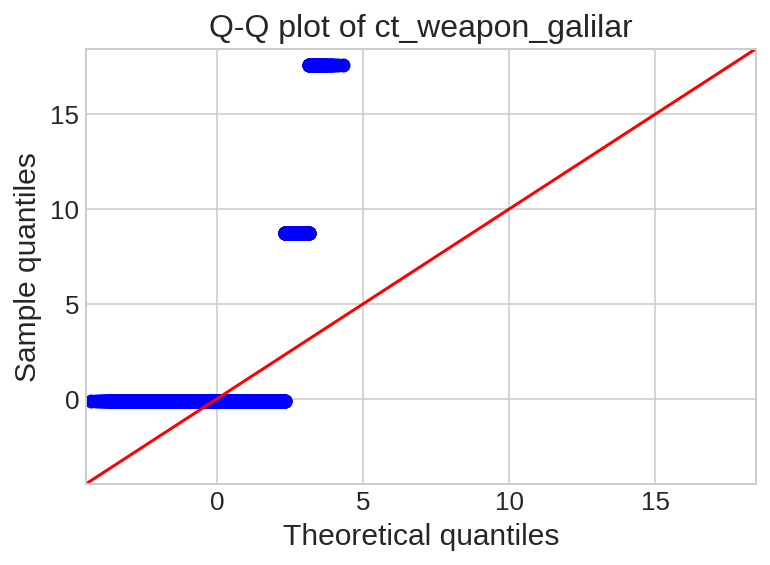

<Figure size 576x360 with 0 Axes>

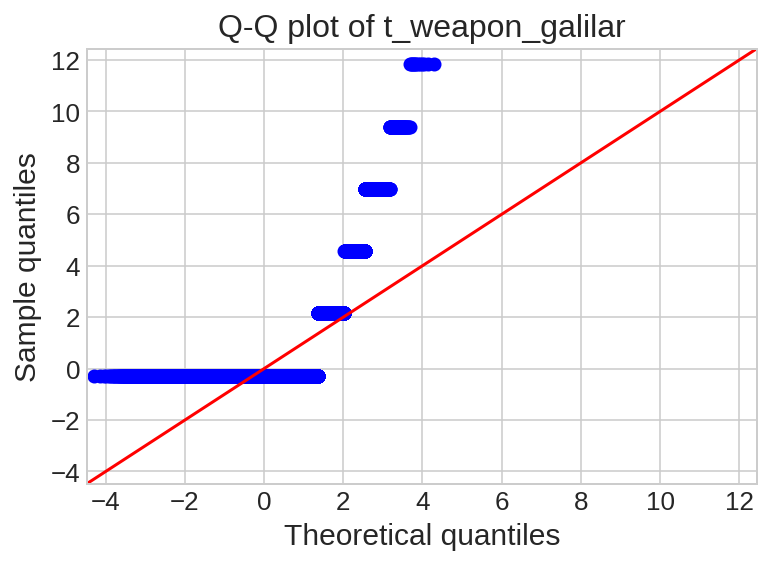

<Figure size 576x360 with 0 Axes>

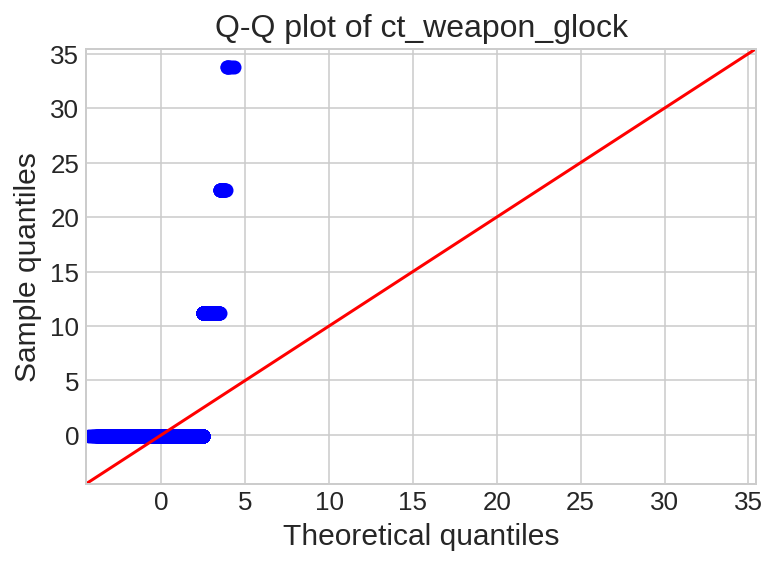

<Figure size 576x360 with 0 Axes>

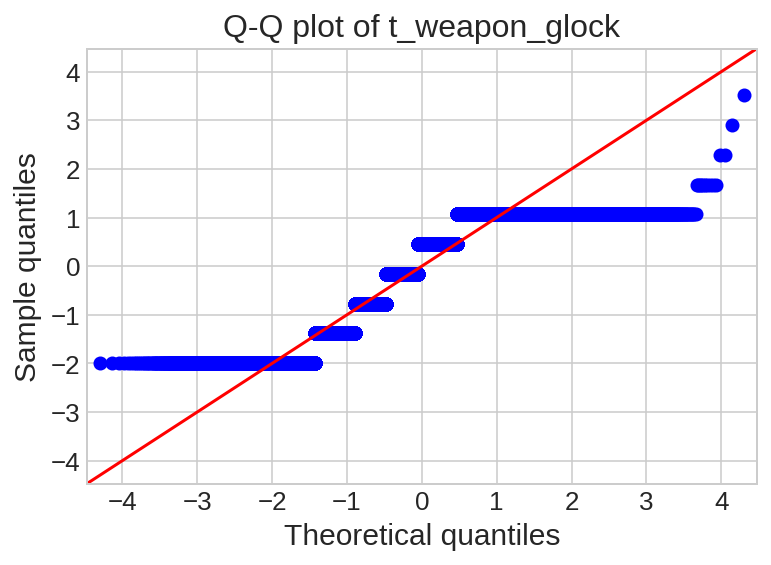

<Figure size 576x360 with 0 Axes>

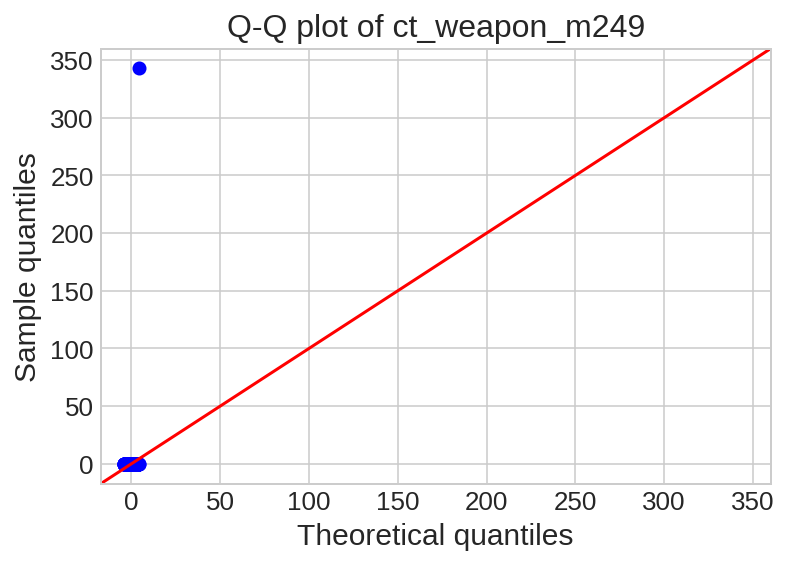

<Figure size 576x360 with 0 Axes>

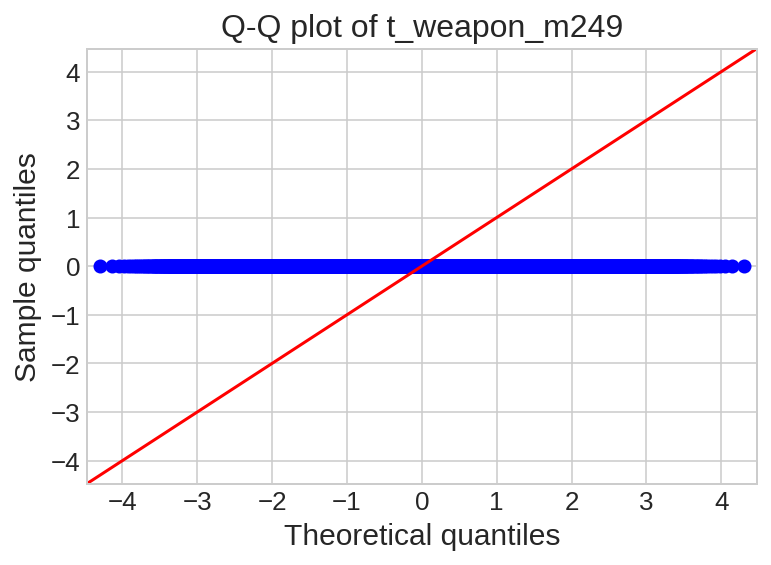

<Figure size 576x360 with 0 Axes>

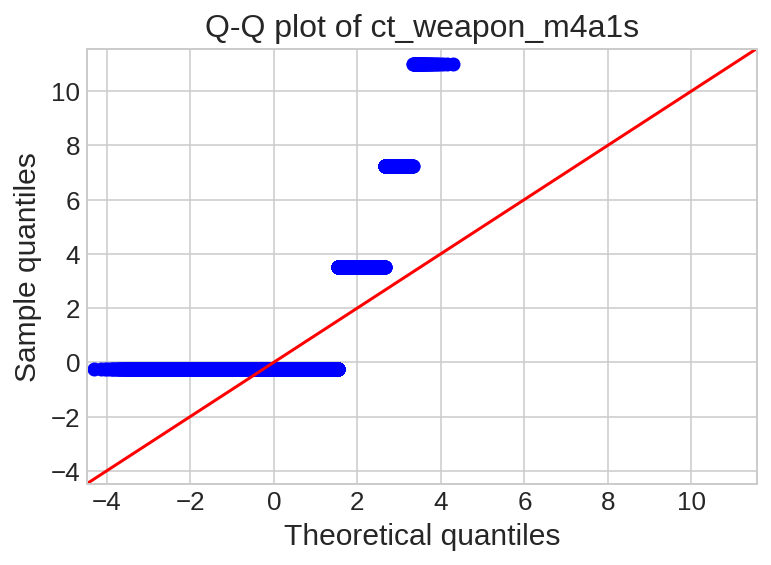

<Figure size 576x360 with 0 Axes>

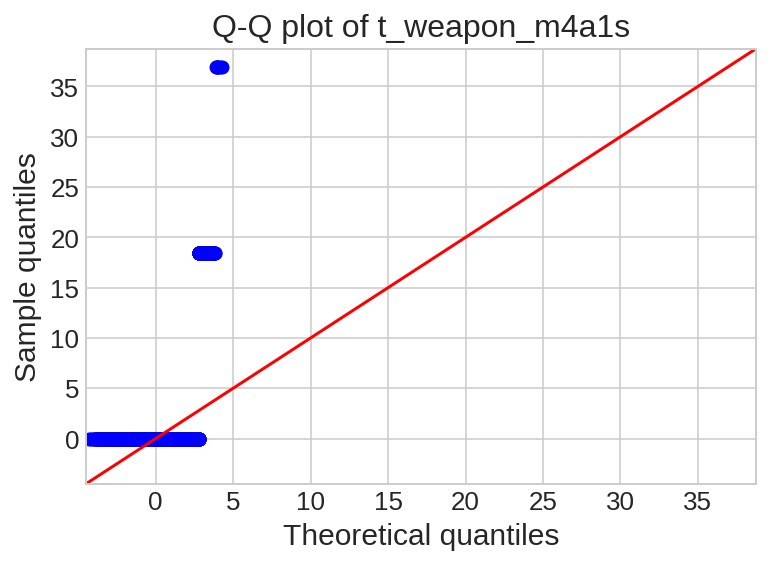

<Figure size 576x360 with 0 Axes>

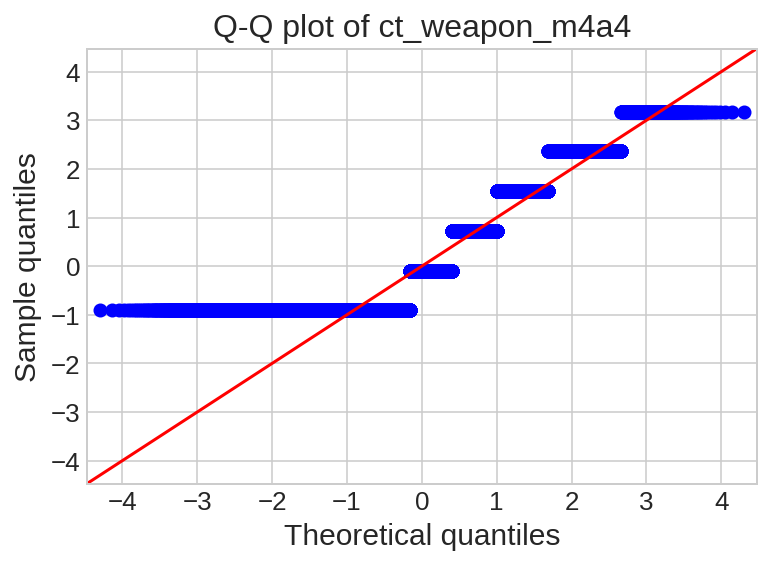

<Figure size 576x360 with 0 Axes>

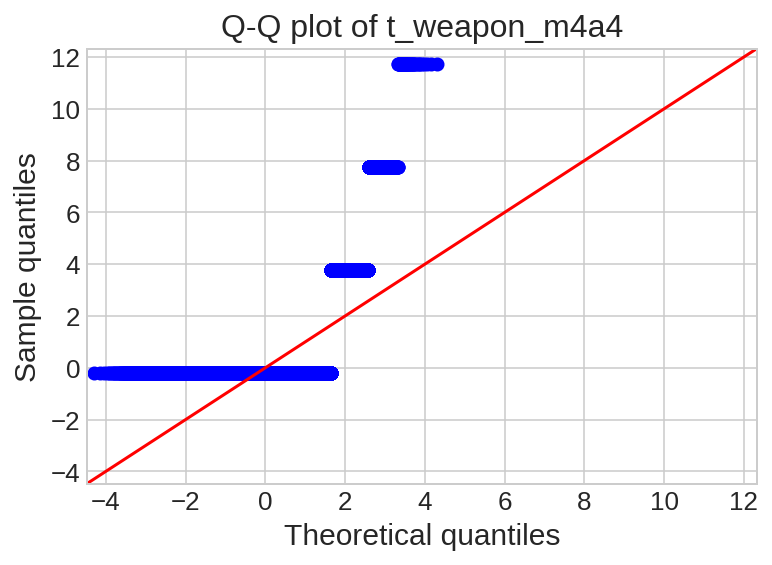

<Figure size 576x360 with 0 Axes>

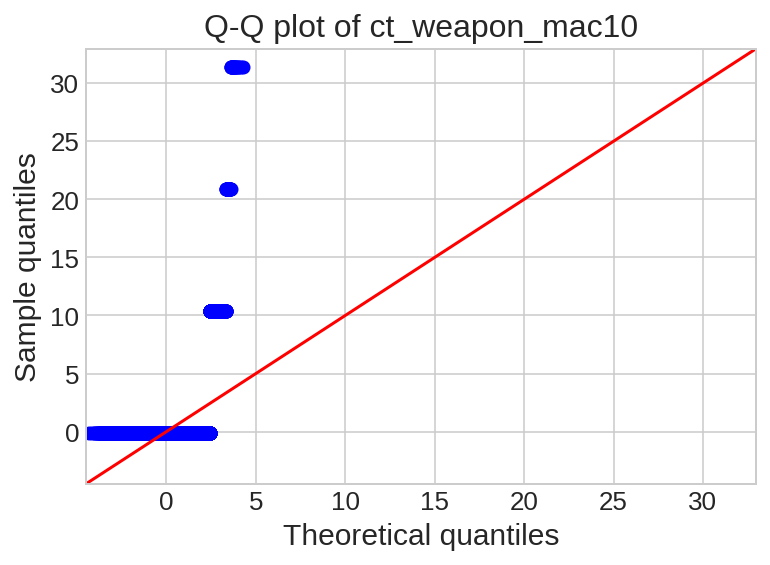

<Figure size 576x360 with 0 Axes>

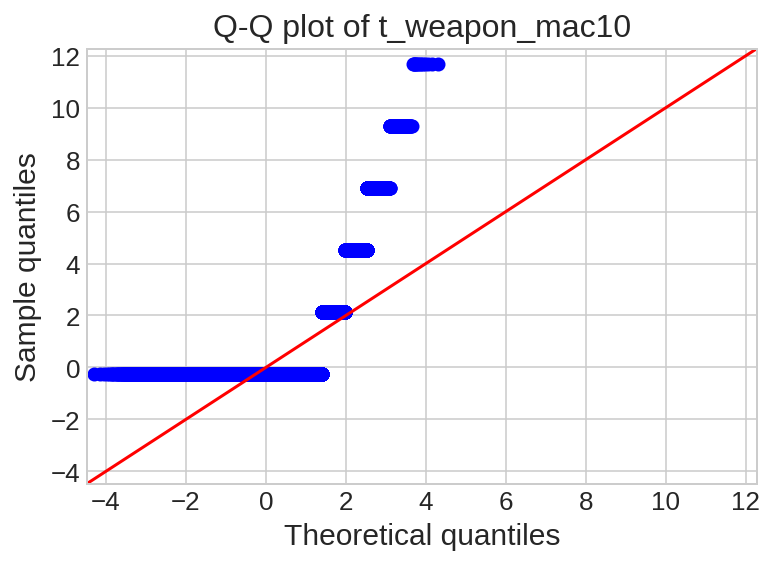

<Figure size 576x360 with 0 Axes>

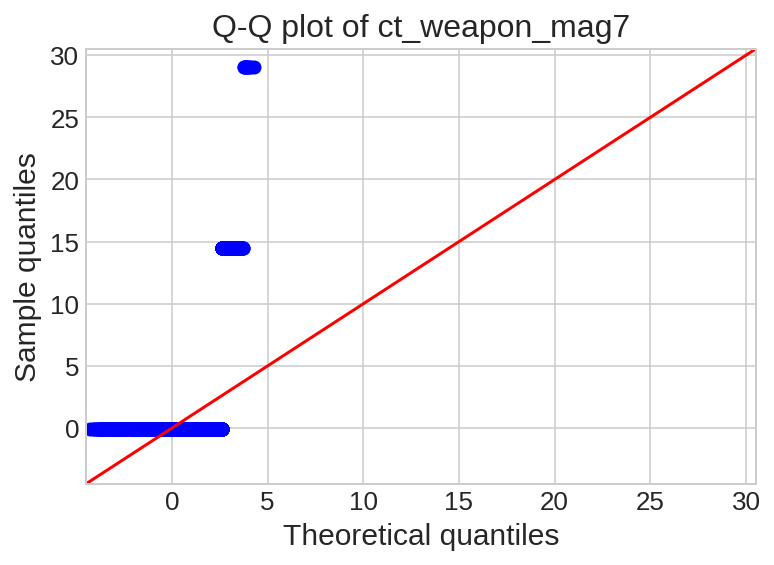

<Figure size 576x360 with 0 Axes>

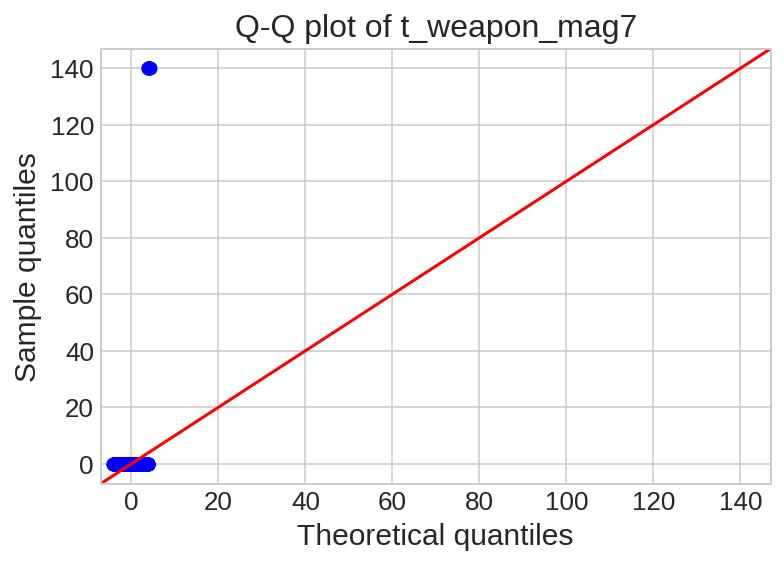

<Figure size 576x360 with 0 Axes>

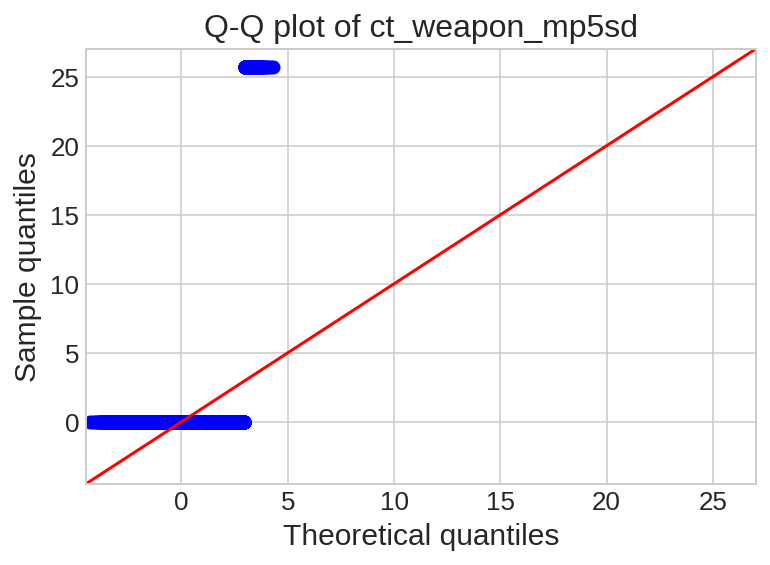

<Figure size 576x360 with 0 Axes>

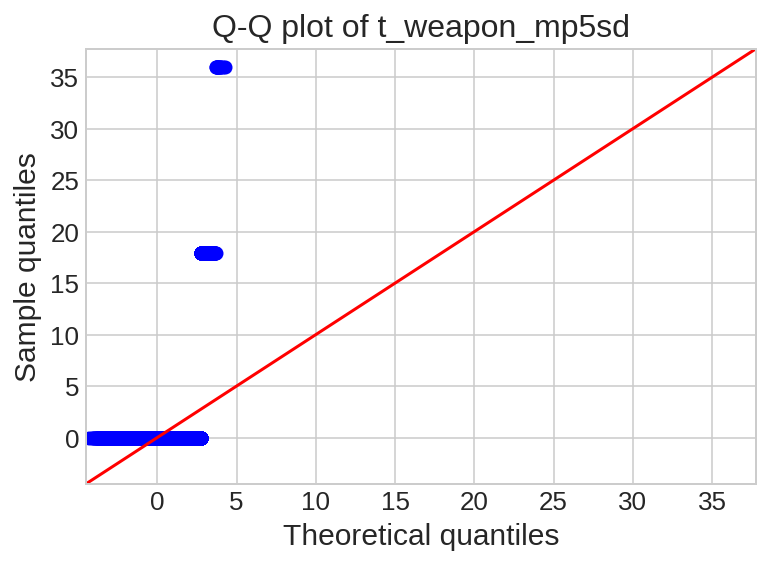

<Figure size 576x360 with 0 Axes>

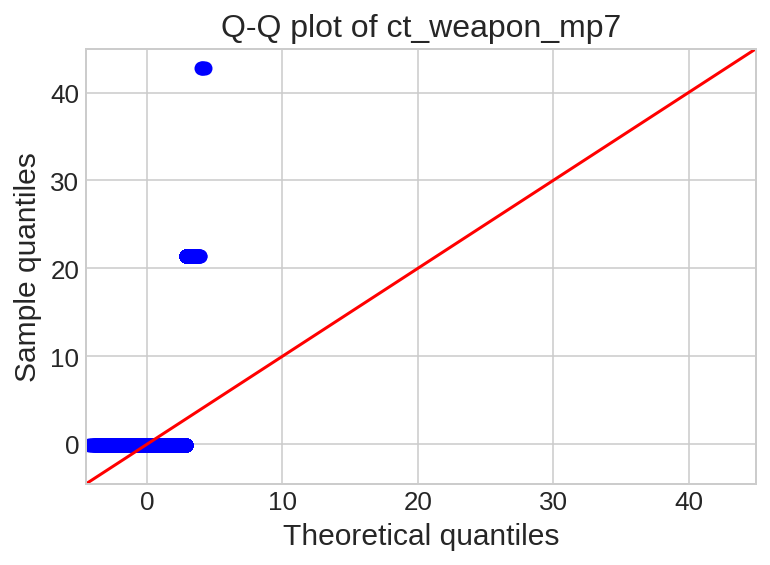

<Figure size 576x360 with 0 Axes>

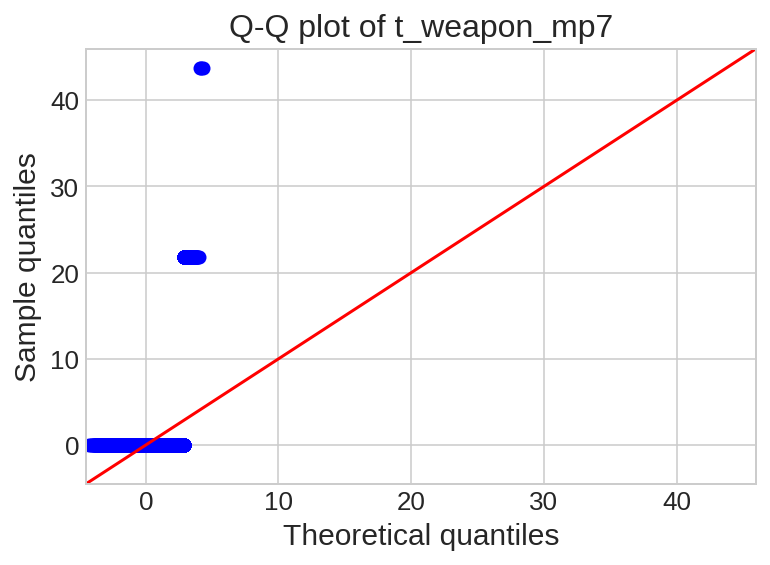

<Figure size 576x360 with 0 Axes>

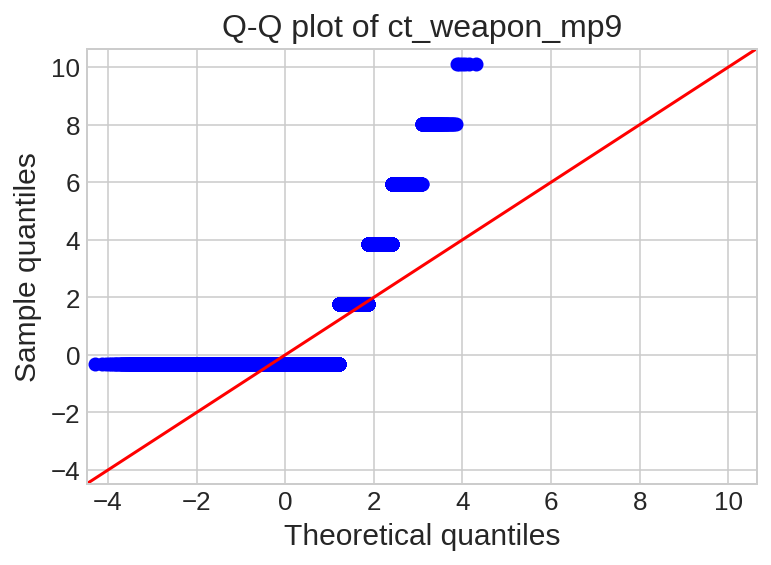

<Figure size 576x360 with 0 Axes>

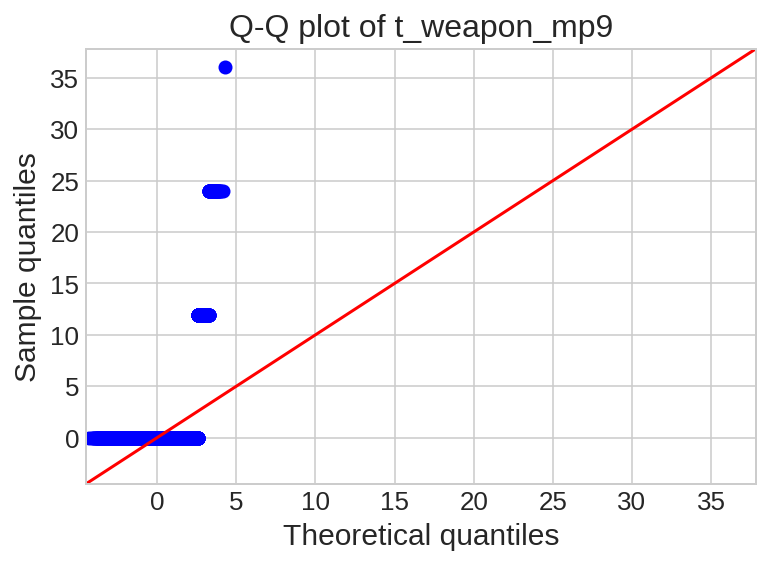

<Figure size 576x360 with 0 Axes>

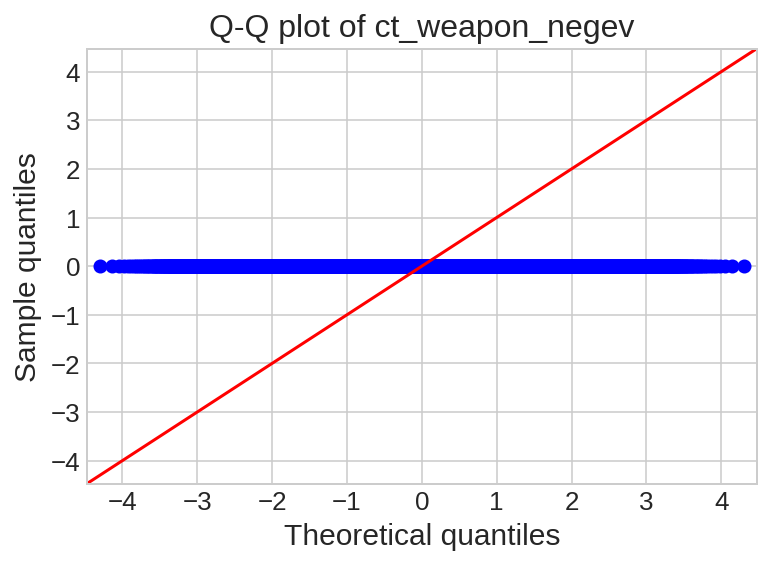

<Figure size 576x360 with 0 Axes>

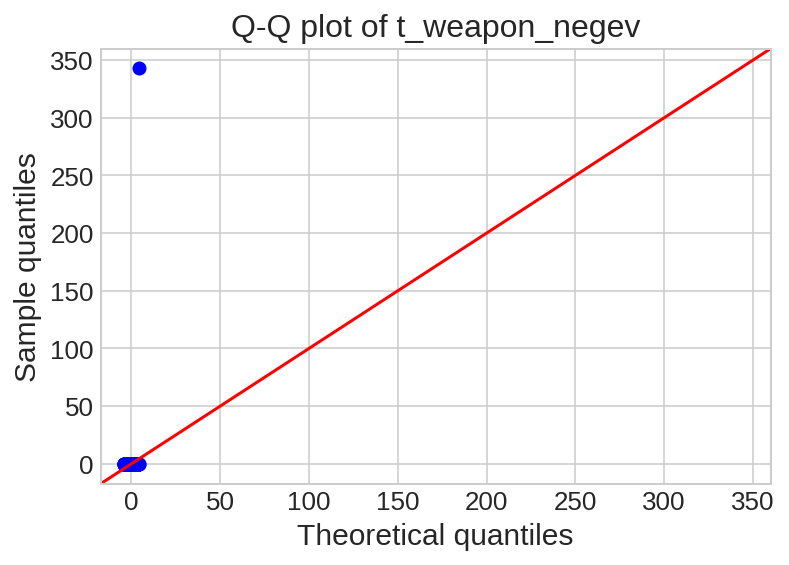

<Figure size 576x360 with 0 Axes>

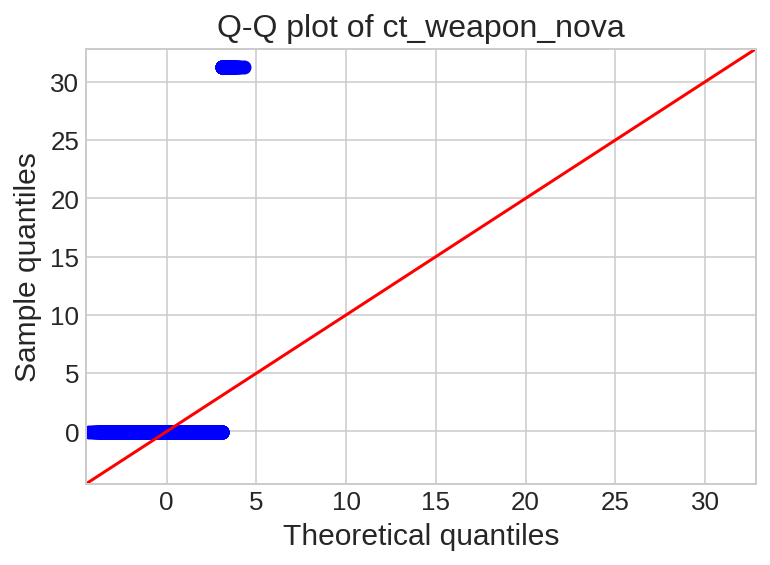

<Figure size 576x360 with 0 Axes>

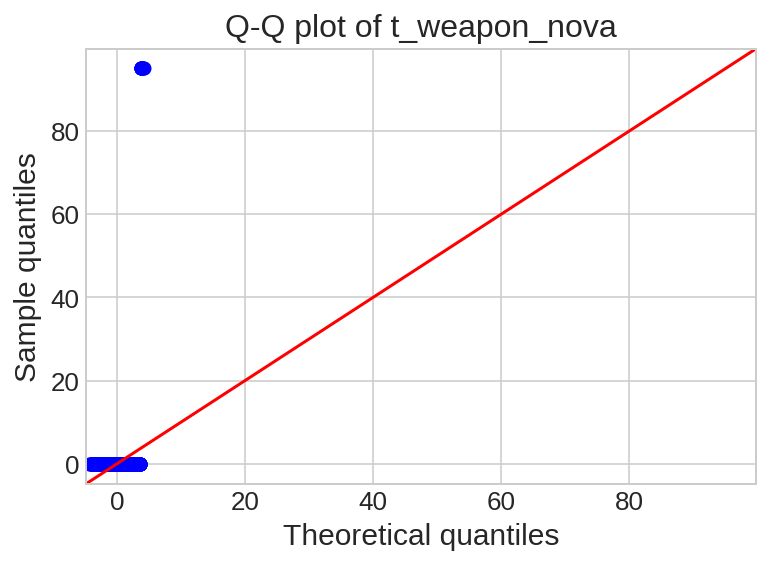

<Figure size 576x360 with 0 Axes>

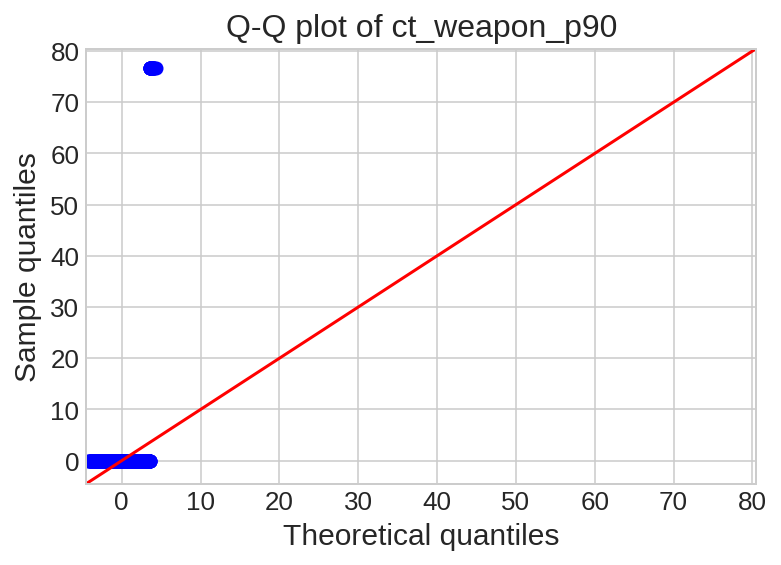

<Figure size 576x360 with 0 Axes>

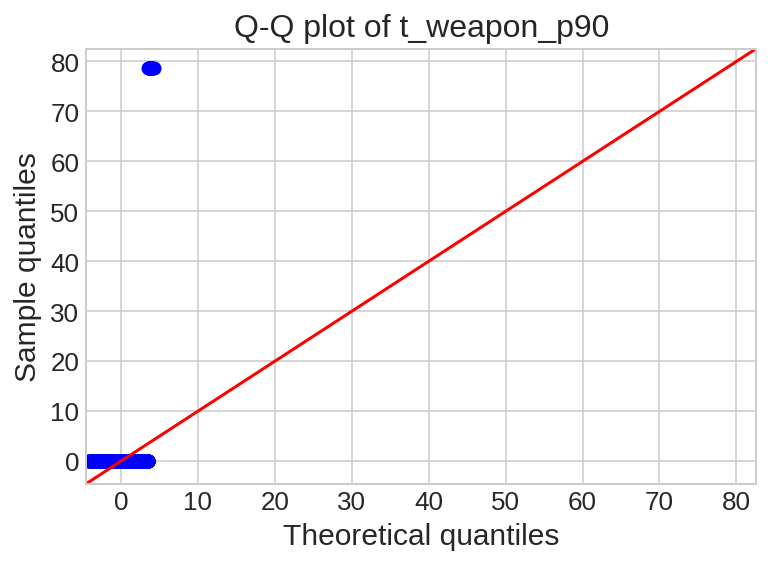

<Figure size 576x360 with 0 Axes>

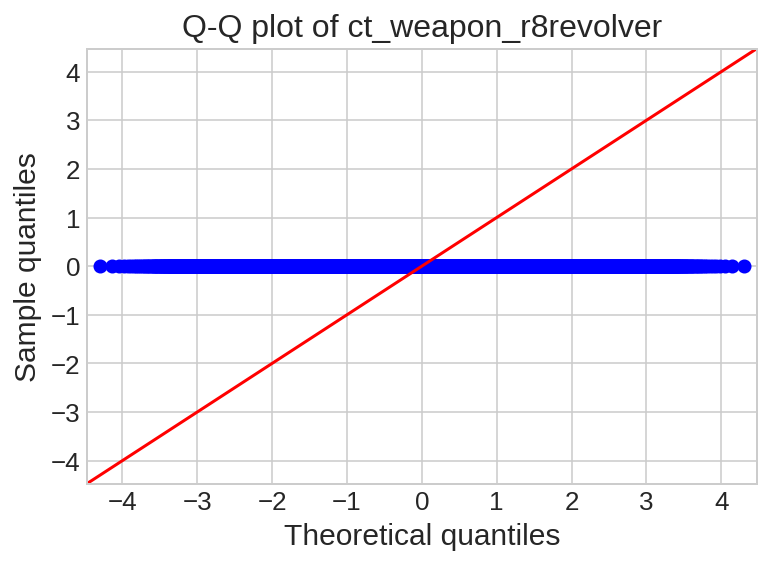

<Figure size 576x360 with 0 Axes>

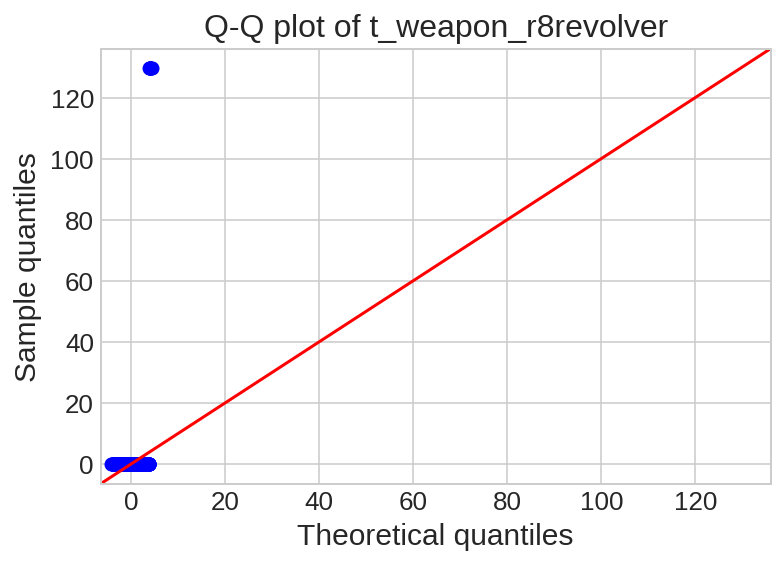

<Figure size 576x360 with 0 Axes>

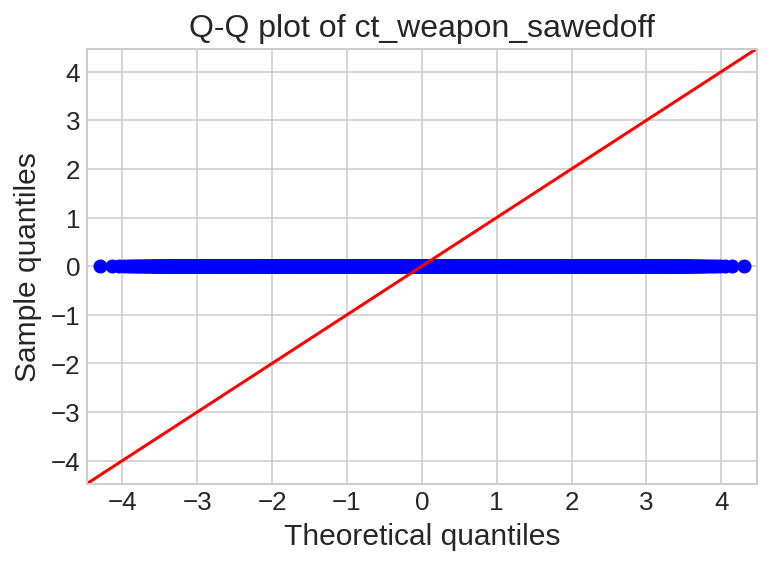

<Figure size 576x360 with 0 Axes>

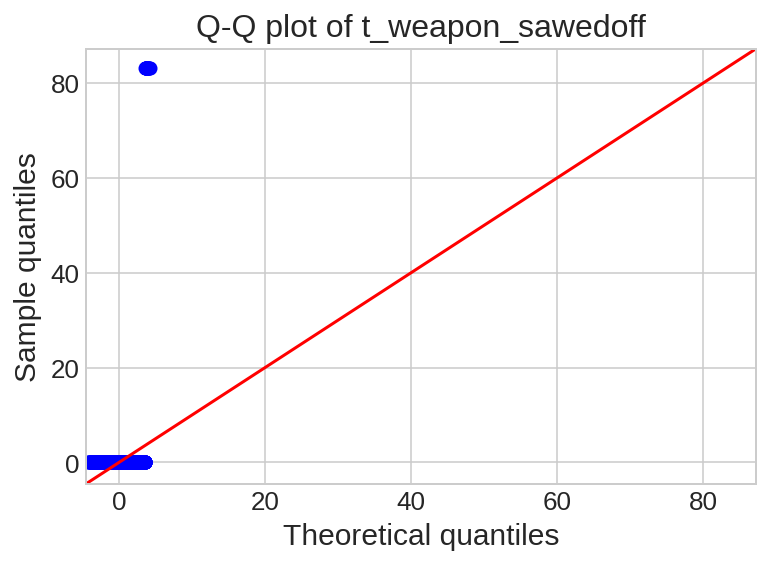

<Figure size 576x360 with 0 Axes>

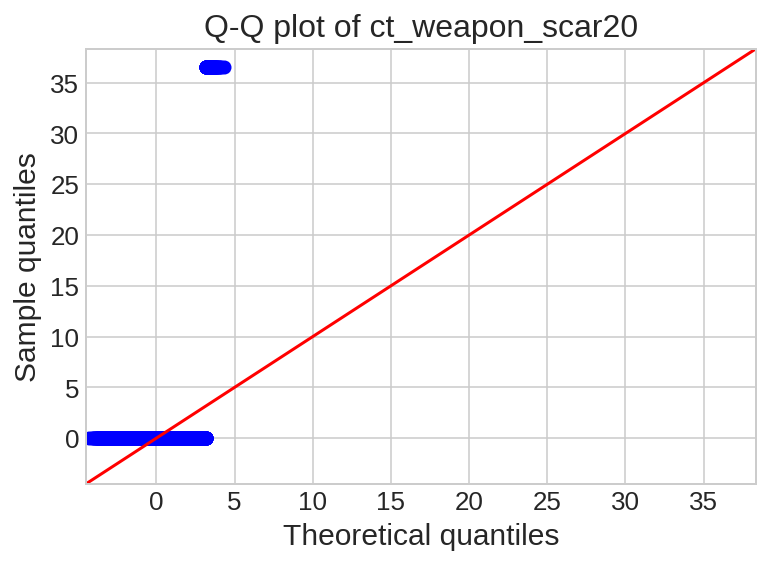

<Figure size 576x360 with 0 Axes>

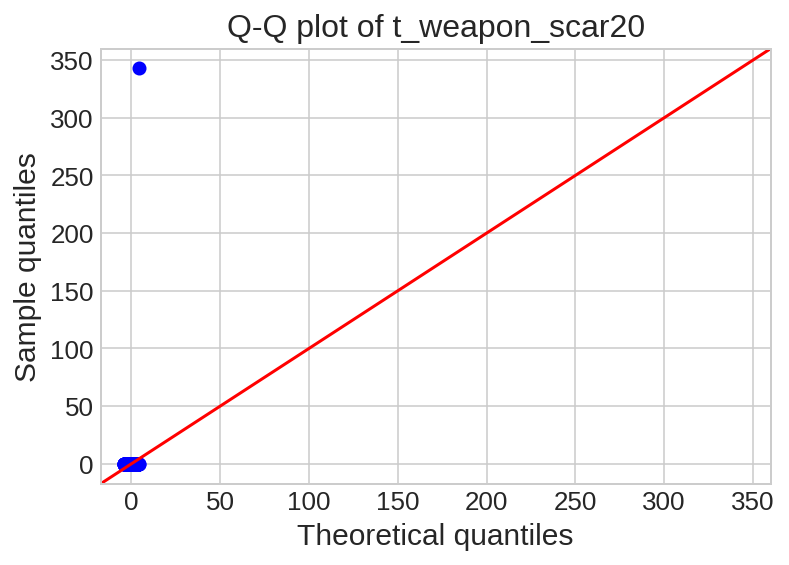

<Figure size 576x360 with 0 Axes>

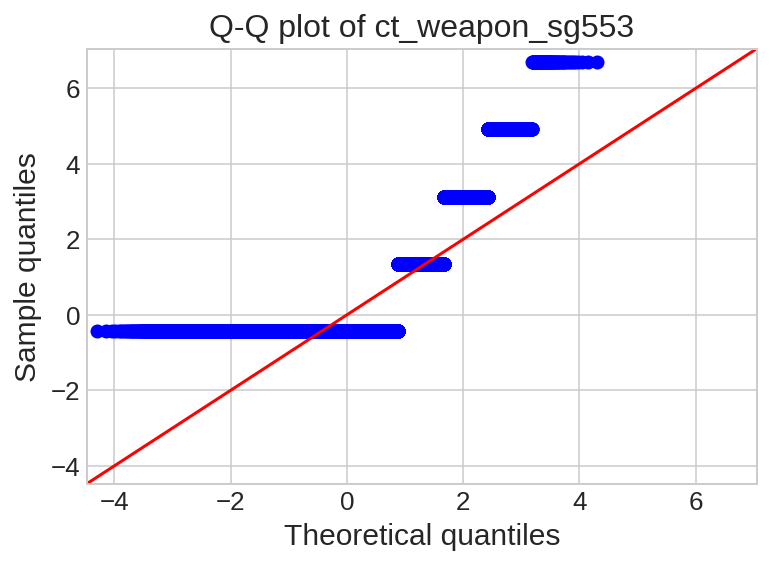

<Figure size 576x360 with 0 Axes>

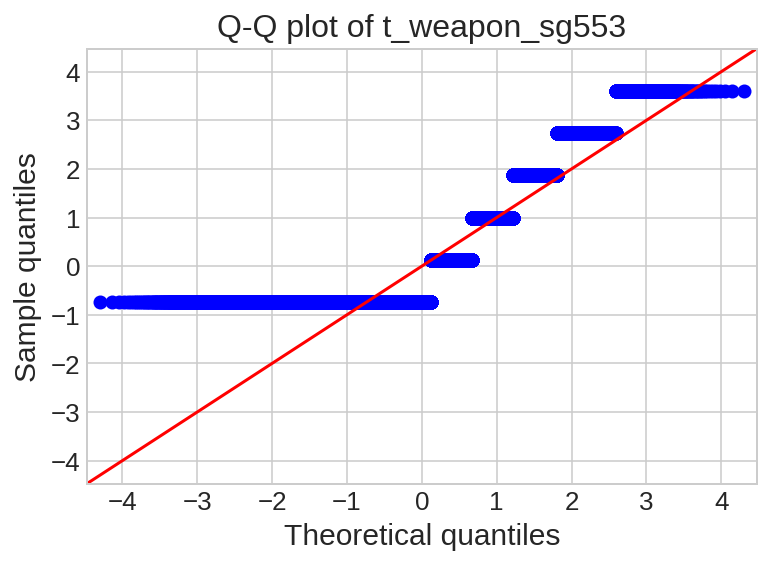

<Figure size 576x360 with 0 Axes>

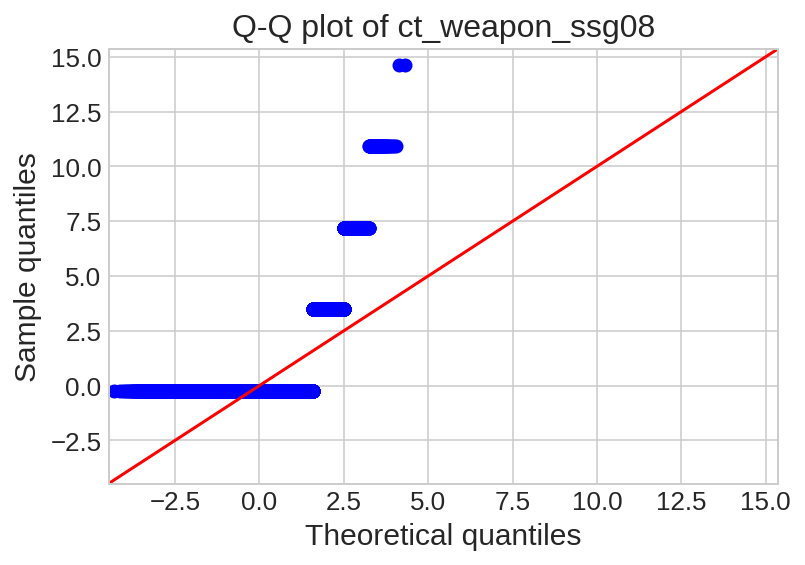

<Figure size 576x360 with 0 Axes>

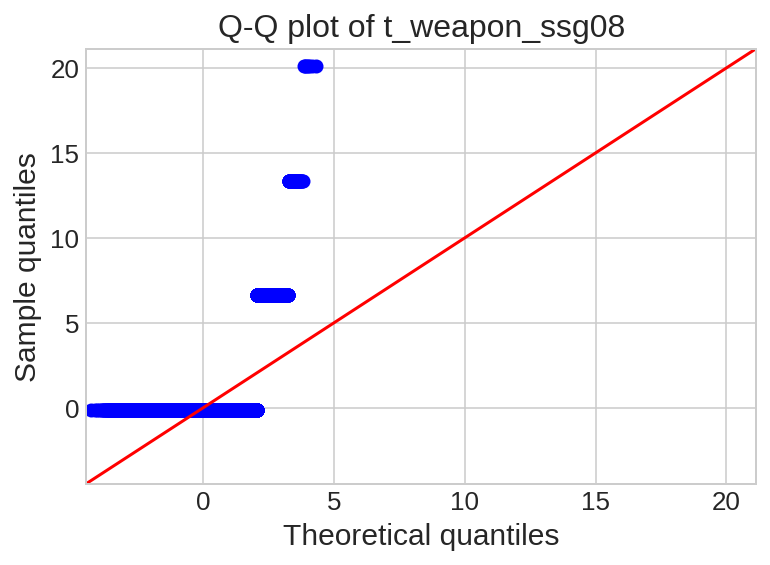

<Figure size 576x360 with 0 Axes>

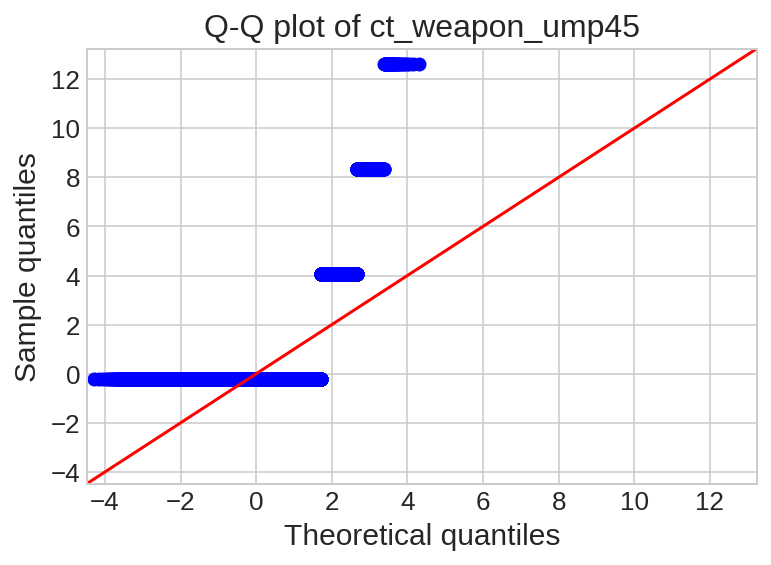

<Figure size 576x360 with 0 Axes>

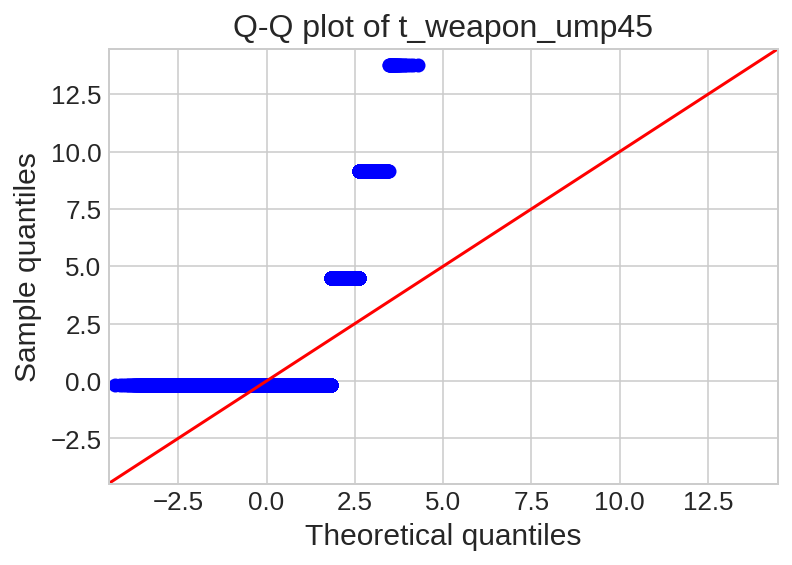

<Figure size 576x360 with 0 Axes>

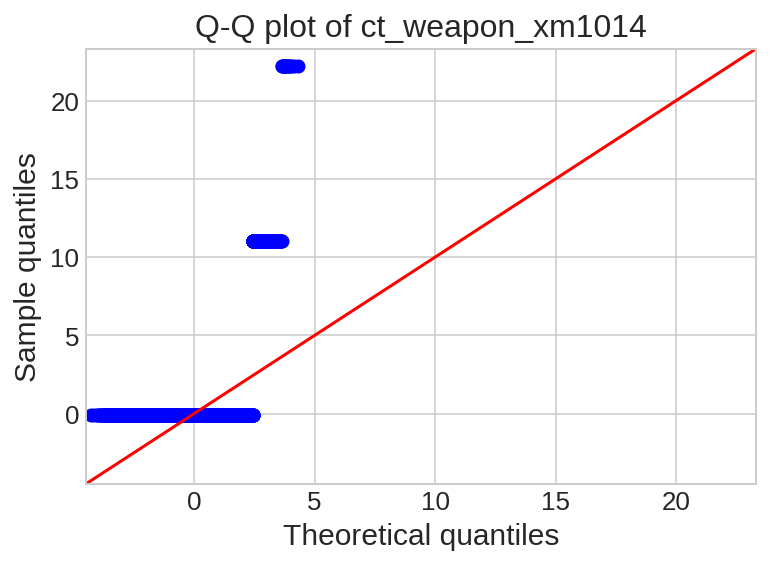

<Figure size 576x360 with 0 Axes>

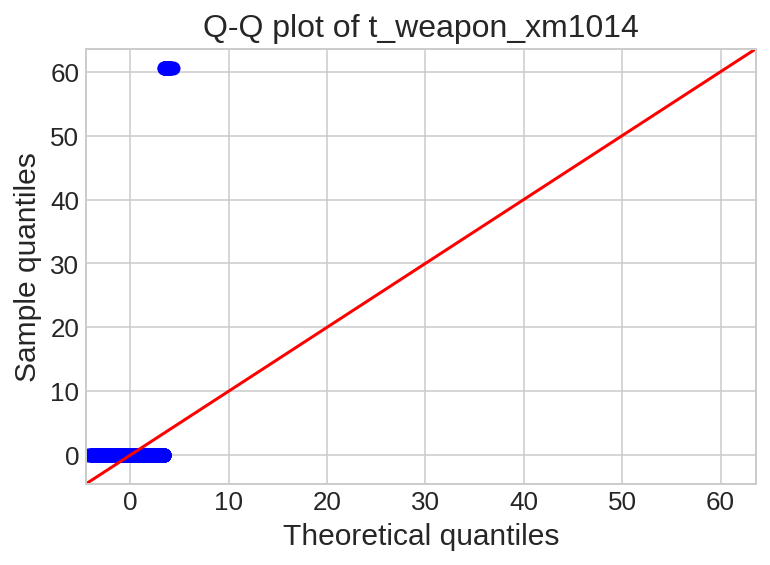

<Figure size 576x360 with 0 Axes>

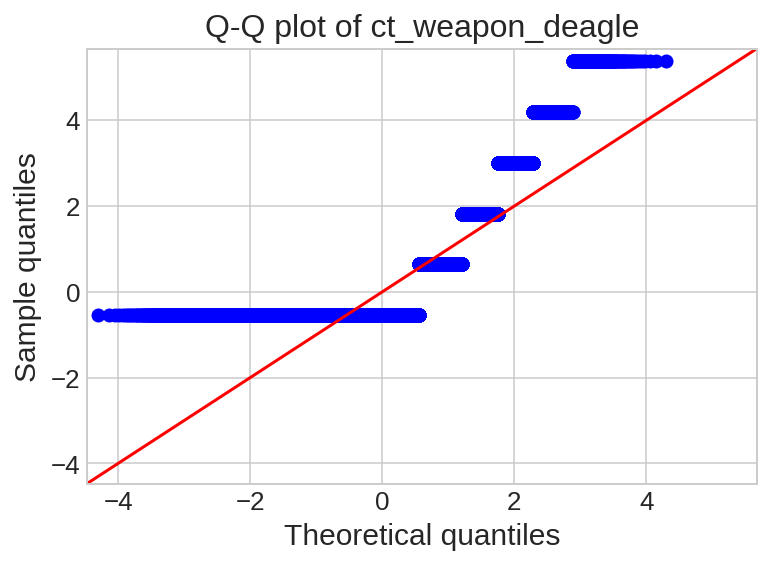

<Figure size 576x360 with 0 Axes>

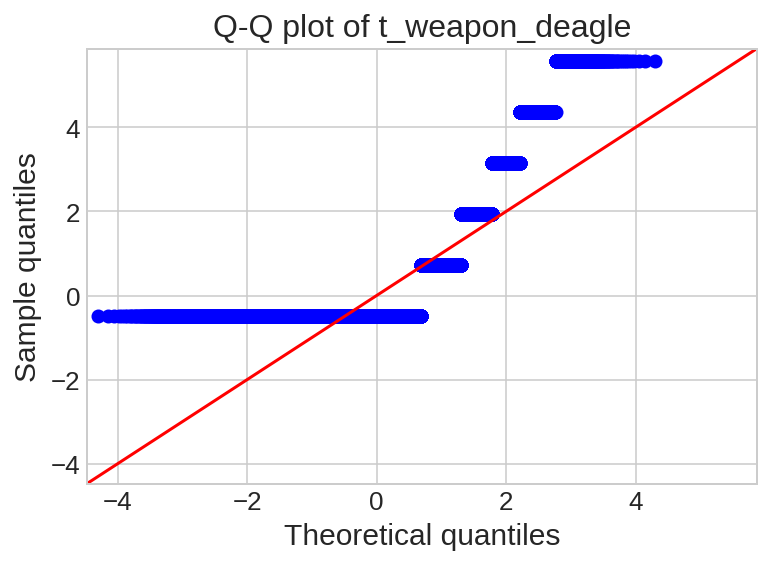

<Figure size 576x360 with 0 Axes>

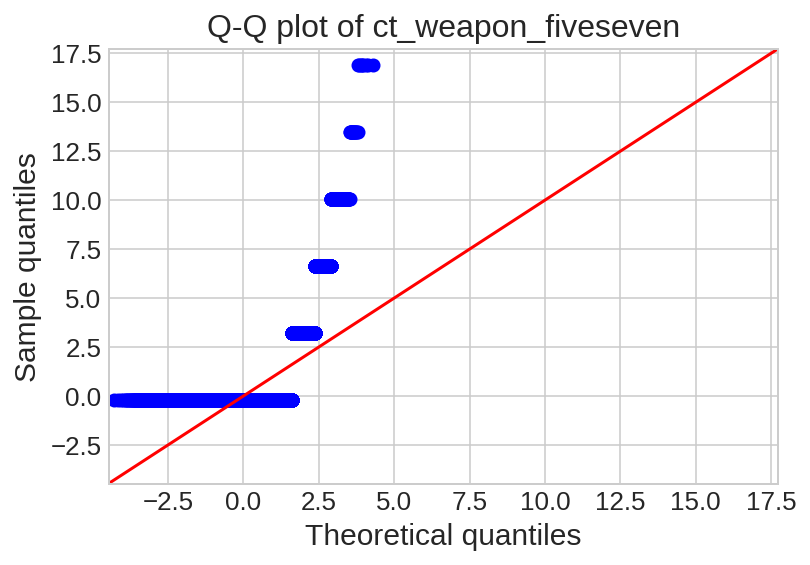

<Figure size 576x360 with 0 Axes>

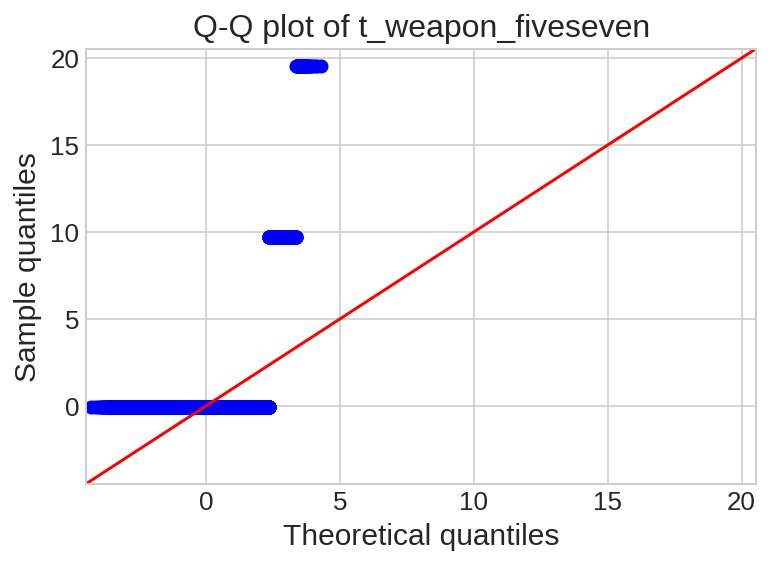

<Figure size 576x360 with 0 Axes>

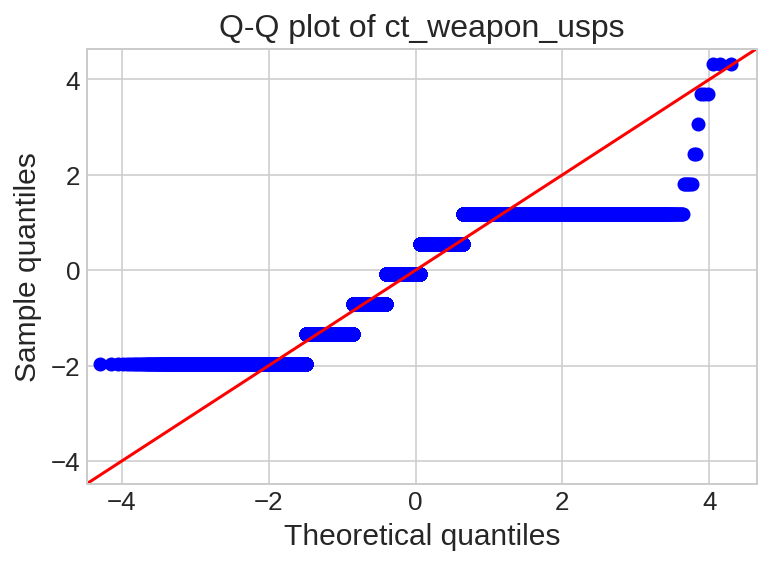

<Figure size 576x360 with 0 Axes>

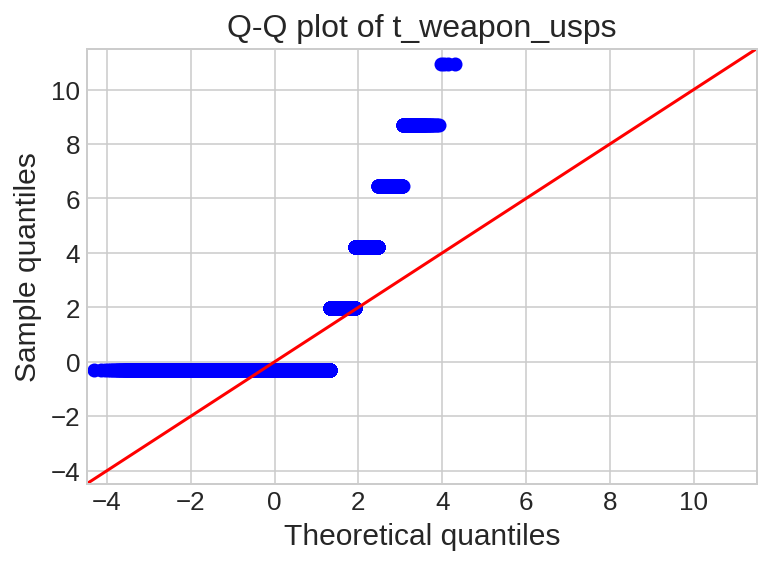

<Figure size 576x360 with 0 Axes>

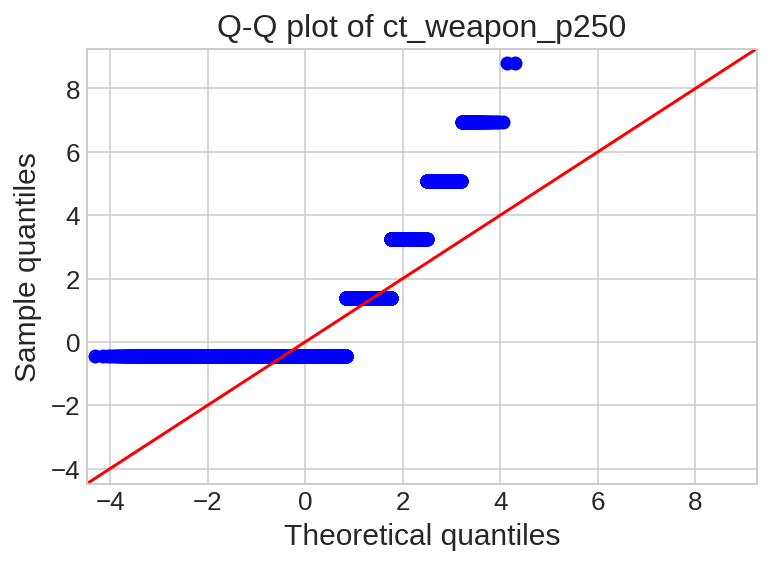

<Figure size 576x360 with 0 Axes>

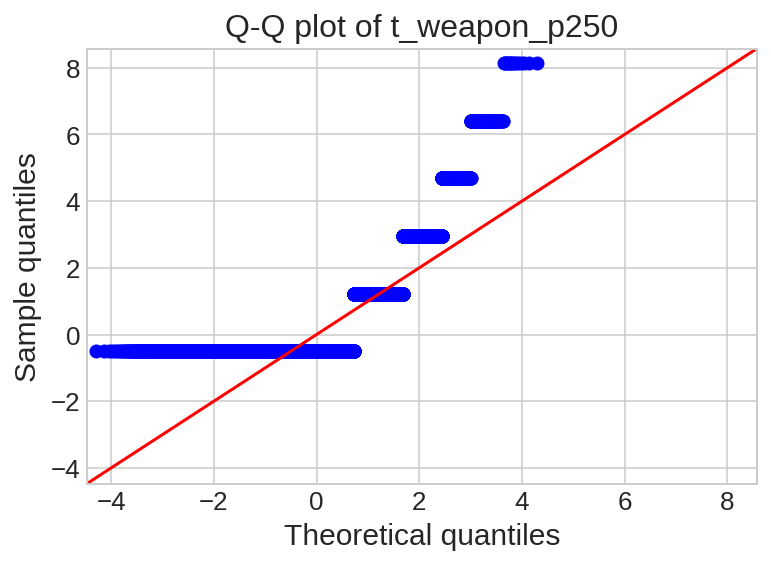

<Figure size 576x360 with 0 Axes>

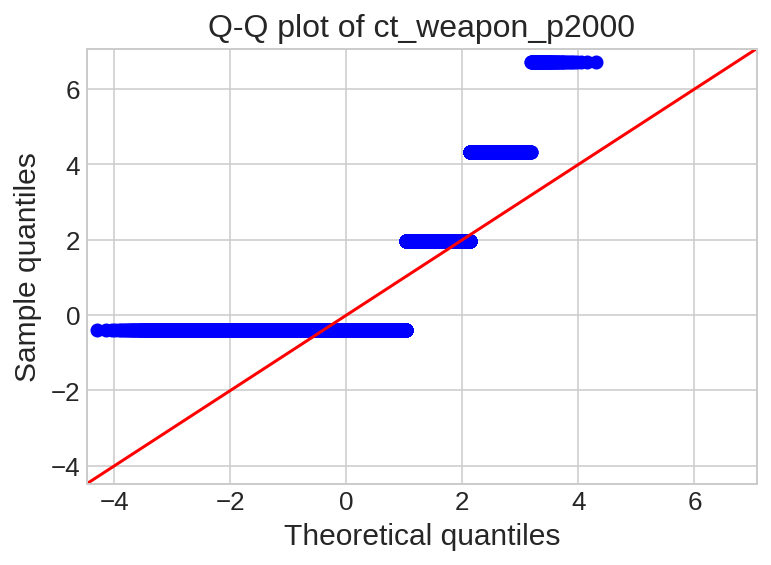

<Figure size 576x360 with 0 Axes>

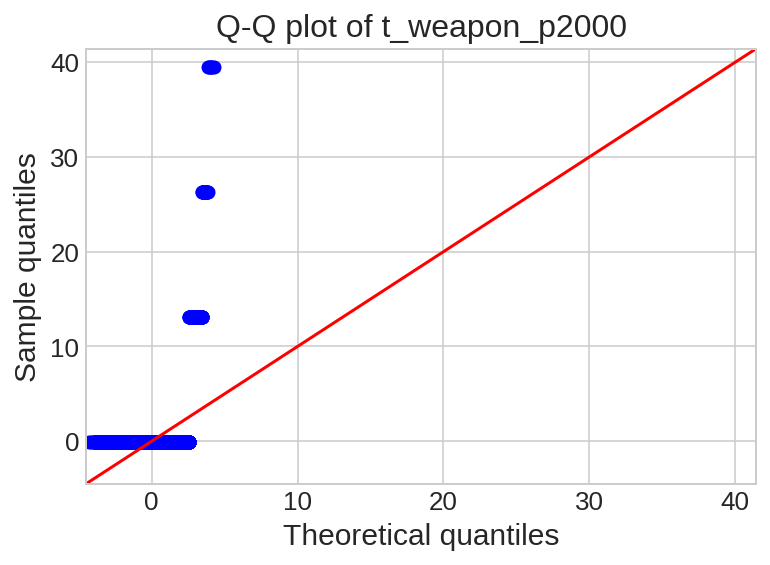

<Figure size 576x360 with 0 Axes>

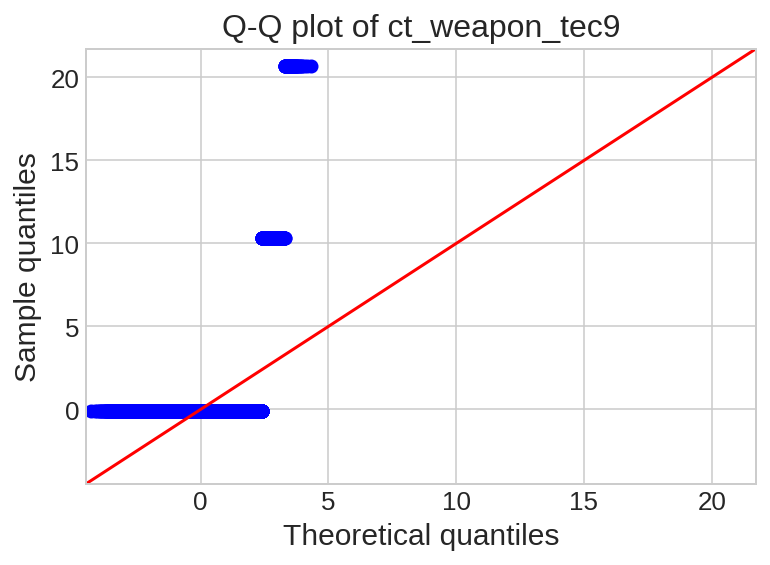

<Figure size 576x360 with 0 Axes>

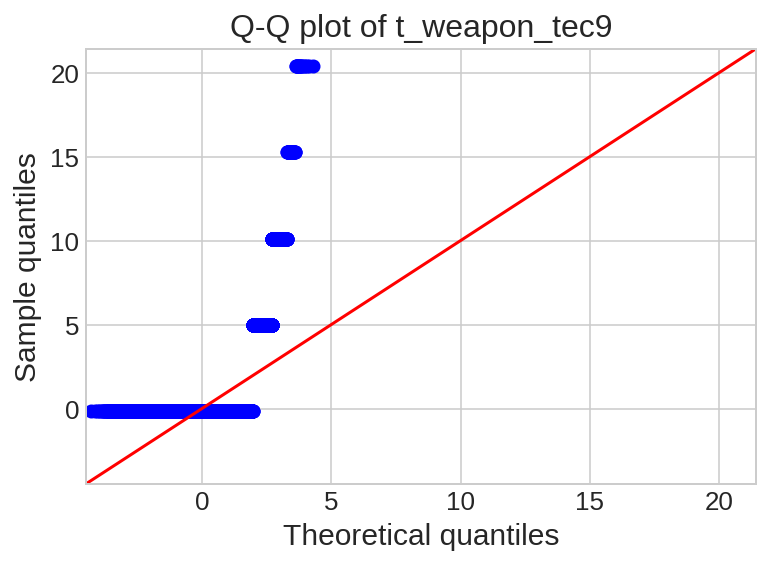

<Figure size 576x360 with 0 Axes>

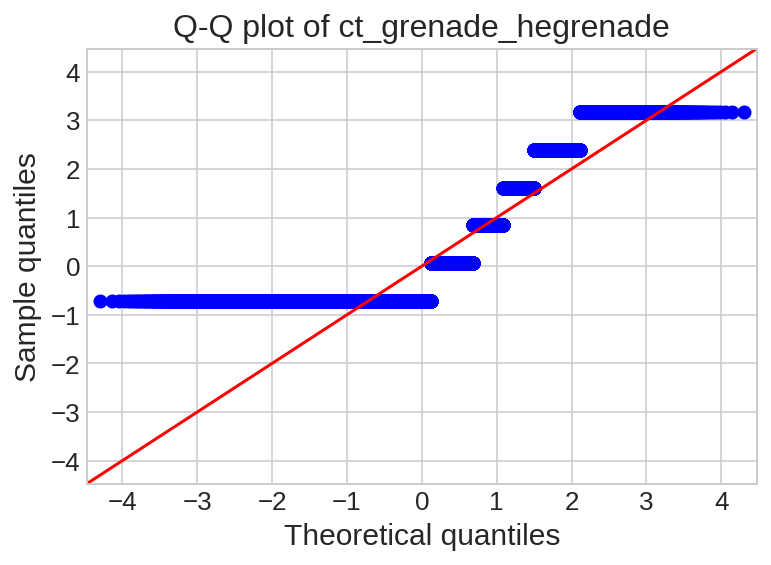

<Figure size 576x360 with 0 Axes>

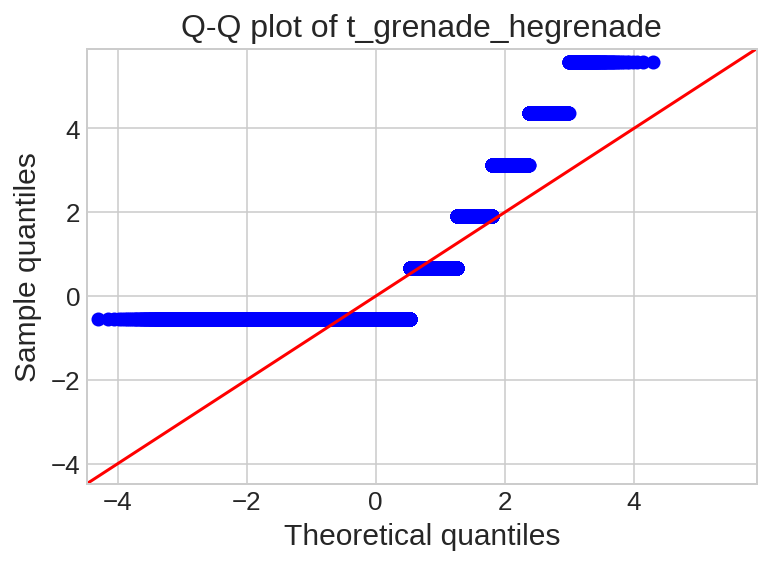

<Figure size 576x360 with 0 Axes>

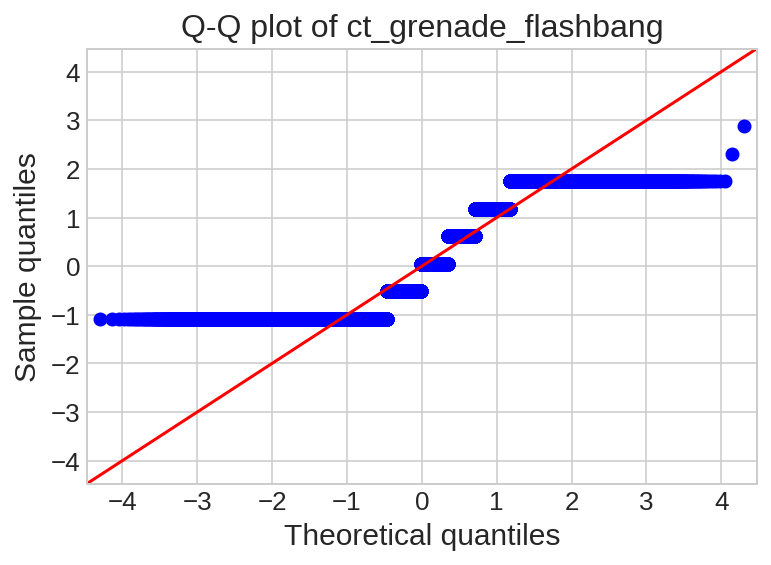

<Figure size 576x360 with 0 Axes>

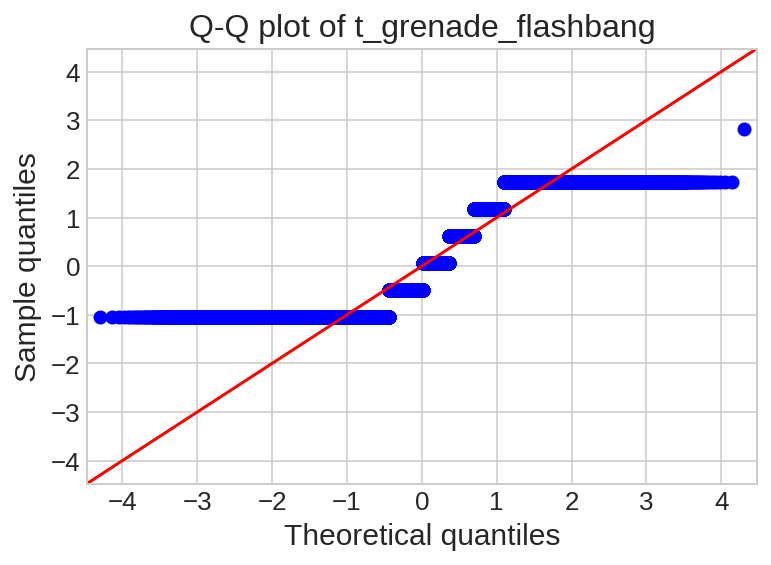

<Figure size 576x360 with 0 Axes>

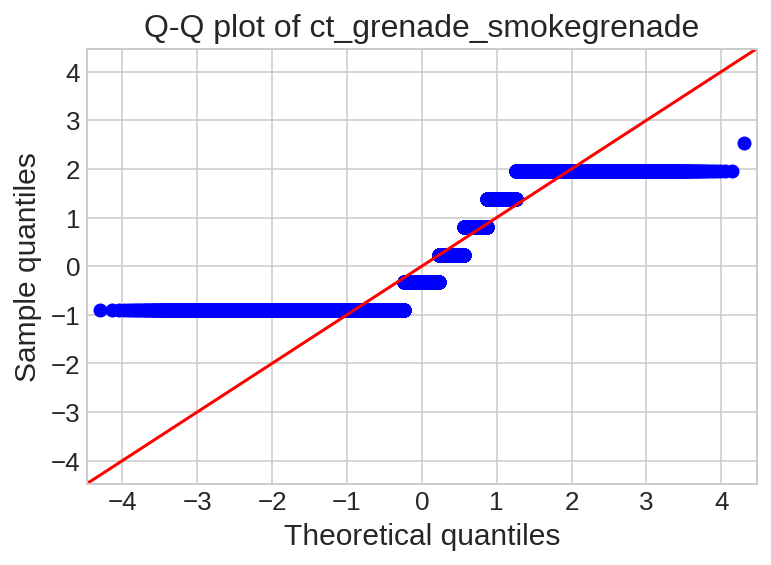

<Figure size 576x360 with 0 Axes>

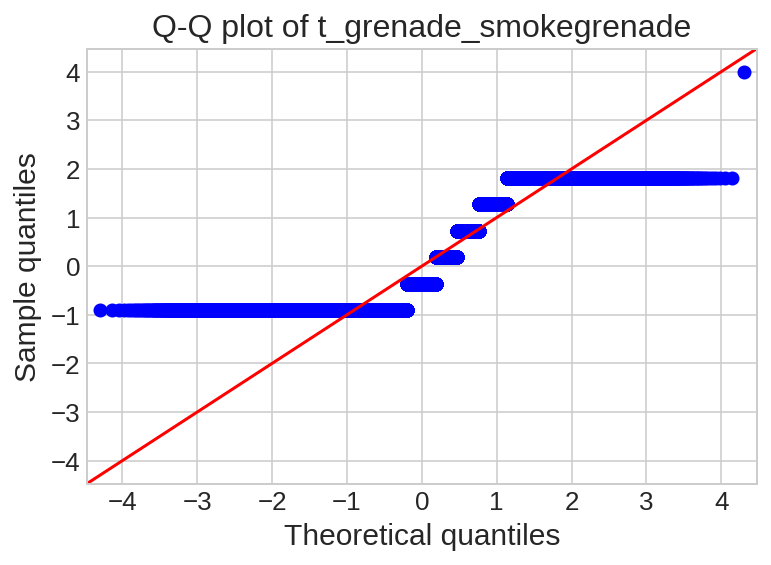

<Figure size 576x360 with 0 Axes>

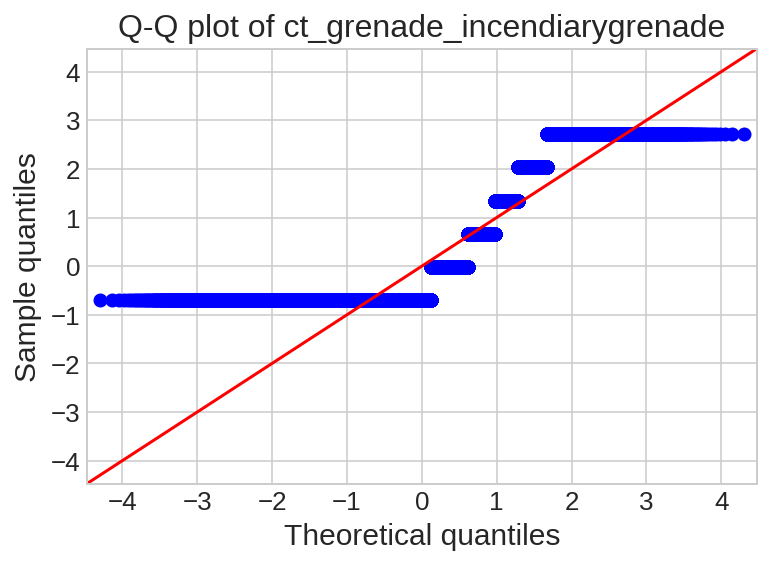

<Figure size 576x360 with 0 Axes>

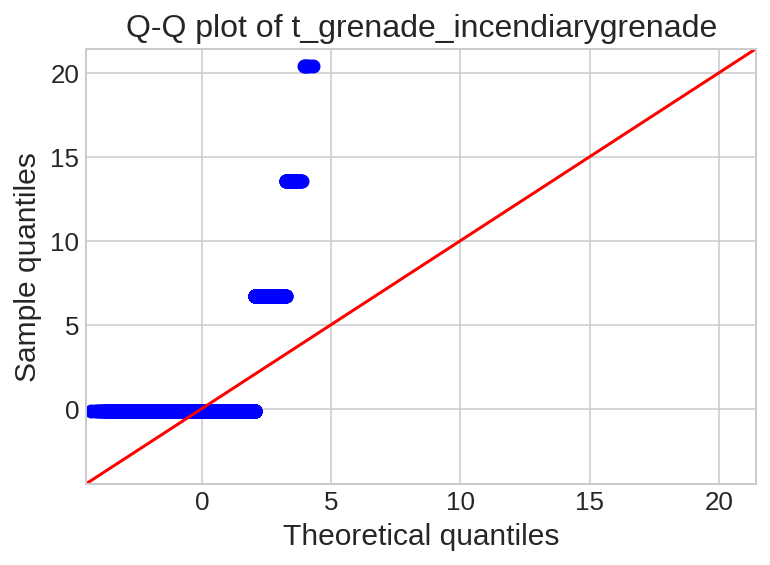

<Figure size 576x360 with 0 Axes>

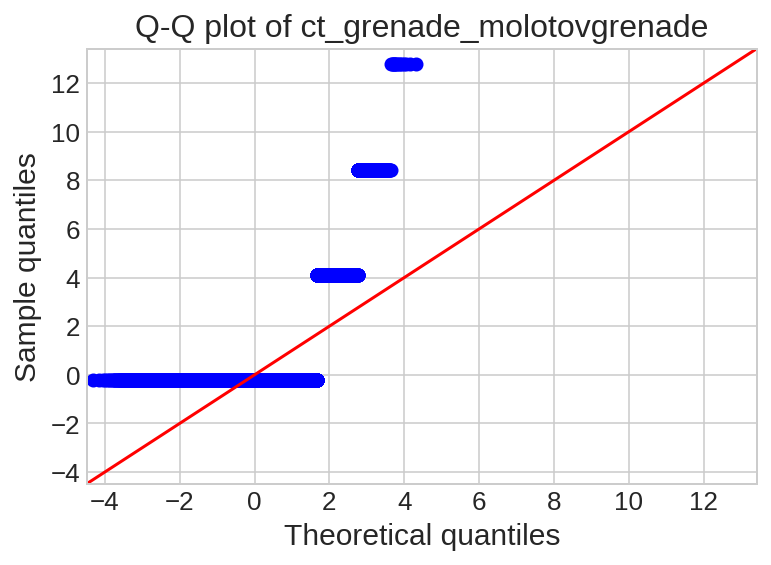

<Figure size 576x360 with 0 Axes>

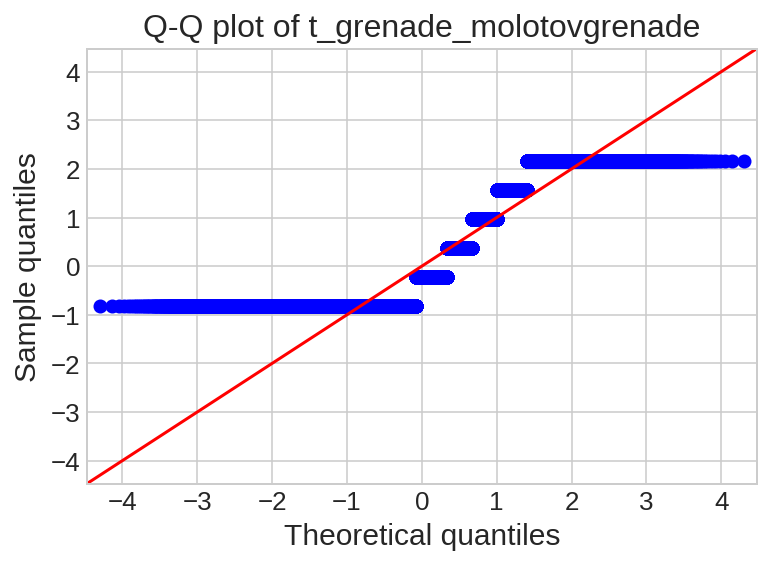

<Figure size 576x360 with 0 Axes>

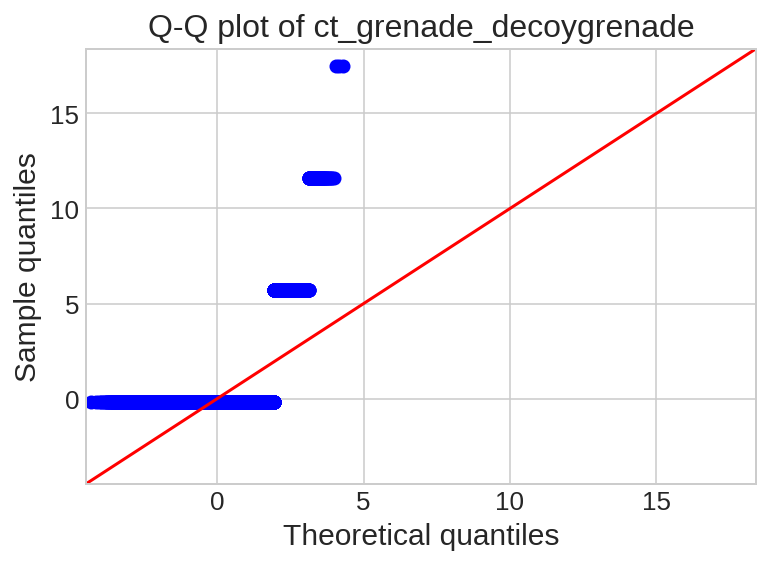

<Figure size 576x360 with 0 Axes>

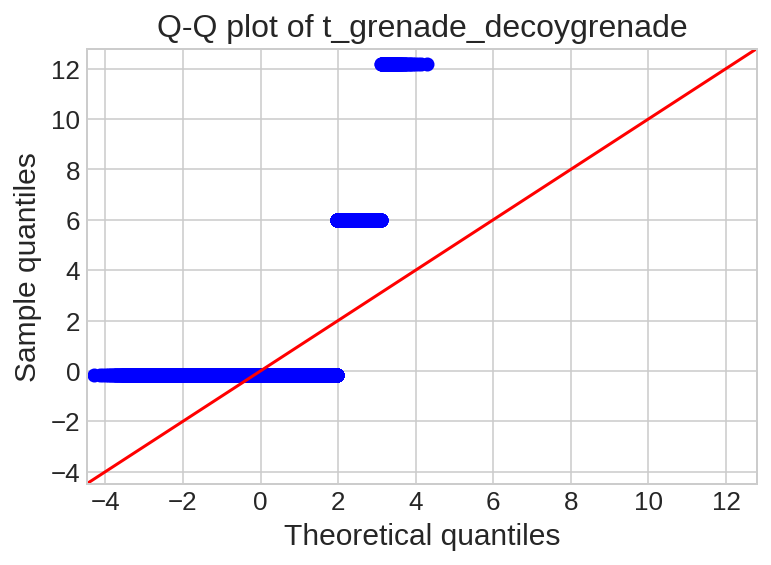

In [21]:
#checking the distribution of independent variables
#Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['time_left','ct_score','t_score','ct_health','t_health','ct_armor','t_armor','ct_money','t_money','ct_helmets','t_helmets',
'ct_defuse_kits','ct_players_alive','t_players_alive','ct_weapon_ak47','t_weapon_ak47','ct_weapon_aug','t_weapon_aug','ct_weapon_awp',
't_weapon_awp','ct_weapon_bizon','t_weapon_bizon','ct_weapon_cz75auto','t_weapon_cz75auto','ct_weapon_elite','t_weapon_elite',
'ct_weapon_famas','t_weapon_famas','ct_weapon_g3sg1','t_weapon_g3sg1','ct_weapon_galilar','t_weapon_galilar','ct_weapon_glock',
't_weapon_glock','ct_weapon_m249','t_weapon_m249','ct_weapon_m4a1s','t_weapon_m4a1s','ct_weapon_m4a4','t_weapon_m4a4','ct_weapon_mac10',
't_weapon_mac10','ct_weapon_mag7','t_weapon_mag7','ct_weapon_mp5sd','t_weapon_mp5sd','ct_weapon_mp7','t_weapon_mp7','ct_weapon_mp9',
't_weapon_mp9','ct_weapon_negev','t_weapon_negev','ct_weapon_nova','t_weapon_nova','ct_weapon_p90','t_weapon_p90','ct_weapon_r8revolver',
't_weapon_r8revolver','ct_weapon_sawedoff','t_weapon_sawedoff','ct_weapon_scar20','t_weapon_scar20','ct_weapon_sg553','t_weapon_sg553',
'ct_weapon_ssg08','t_weapon_ssg08','ct_weapon_ump45','t_weapon_ump45','ct_weapon_xm1014','t_weapon_xm1014','ct_weapon_deagle',
't_weapon_deagle','ct_weapon_fiveseven','t_weapon_fiveseven','ct_weapon_usps','t_weapon_usps','ct_weapon_p250','t_weapon_p250',
'ct_weapon_p2000','t_weapon_p2000','ct_weapon_tec9','t_weapon_tec9','ct_grenade_hegrenade','t_grenade_hegrenade','ct_grenade_flashbang',
't_grenade_flashbang','ct_grenade_smokegrenade','t_grenade_smokegrenade','ct_grenade_incendiarygrenade','t_grenade_incendiarygrenade',
'ct_grenade_molotovgrenade','t_grenade_molotovgrenade','ct_grenade_decoygrenade','t_grenade_decoygrenade'
]]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

## Divinding the data into dependent and independent variables

here y is the dependent variable.

and x is culmination of all the independent variables.

In [22]:
y = data['round_winner']
x = data.drop('round_winner', axis=1)

## Scaling all the independent variables for better training of the data.

In [23]:
scaler = RobustScaler()
x = scaler.fit_transform(x)
pd.DataFrame(x)

0         1      2         3    4         5         6   \
0       1.334055 -0.857143 -0.750 -0.666667  0.0  0.000000  0.000000   
1       1.018152 -0.857143 -0.750 -0.666667  0.0  0.000000  0.000000   
2       0.018984 -0.857143 -0.750 -0.666667  0.0 -0.664634 -0.523560   
3      -0.314072 -0.857143 -0.750 -0.666667  0.0 -0.664634 -0.523560   
4       1.333555 -0.714286 -0.750 -0.666667  0.0  0.000000  0.000000   
...          ...       ...    ...       ...  ...       ...       ...   
117443 -1.323564  0.714286  1.000  1.000000  1.0 -1.829268 -1.350785   
117444  1.332889  0.714286  1.125  1.000000  0.0  0.000000  0.000000   
117445  0.333722  0.714286  1.125  1.000000  0.0  0.000000  0.000000   
117446  0.000666  0.714286  1.125  1.000000  0.0  0.000000  0.000000   
117447 -0.332390  0.714286  1.125  1.000000  0.0 -0.762195 -0.109948   

              7         8         9   ...        86        87        88  \
0      -1.308219 -1.208904 -0.138686  ... -0.666667 -0.333333 -0.333333   
1       0.061644 -0.181507 -0.386861  ... -0.666667 -0.333333 -0.333333   
2      -0.301370 -0.523973 -0.375912  ... -0.666667 -0.333333 -0.333333   
3      -0.301370 -0.523973 -0.375912  ... -0.666667 -0.333333 -0.333333   
4      -0.650685 -1.208904  0.908759  ... -0.666667 -0.333333 -0.333333   
...          ...       ...       ...  ...       ...       ...       ...   
117443 -0.640411  0.020548 -0.423358  ... -0.333333  0.333333  0.000000   
117444 -0.982877 -0.609589  0.408759  ... -0.333333  0.333333  0.000000   
117445  0.386986  0.417808 -0.343066  ...  0.666667  1.000000  0.666667   
117446  0.386986  0.417808 -0.343066  ... -0.333333  1.333333 -0.333333   
117447  0.044521  0.386986 -0.350365  ... -0.666667  0.666667 -0.333333   

              89   90   91   92        93   94   95  
0      -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
1       0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
2       0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
3      -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
4      -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
...          ...  ...  ...  ...       ...  ...  ...  
117443  0.000000  0.0  0.0  0.0 -0.333333  0.0  0.0  
117444 -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
117445  1.333333  0.5  0.0  0.0  1.333333  0.0  0.0  
117446  0.666667  0.0  0.0  0.0  1.000000  0.0  0.0  
117447  0.333333  0.0  0.0  0.0  0.666667  0.0  0.0  

[117448 rows x 96 columns]

## Which independent variables are useful to predict a target (dependent variable)?

The three methods we will be following are

1)Pearson Correlation

2)SelectKBest

3)Feature Importance

Creaing Pearson Correlation Heat Map

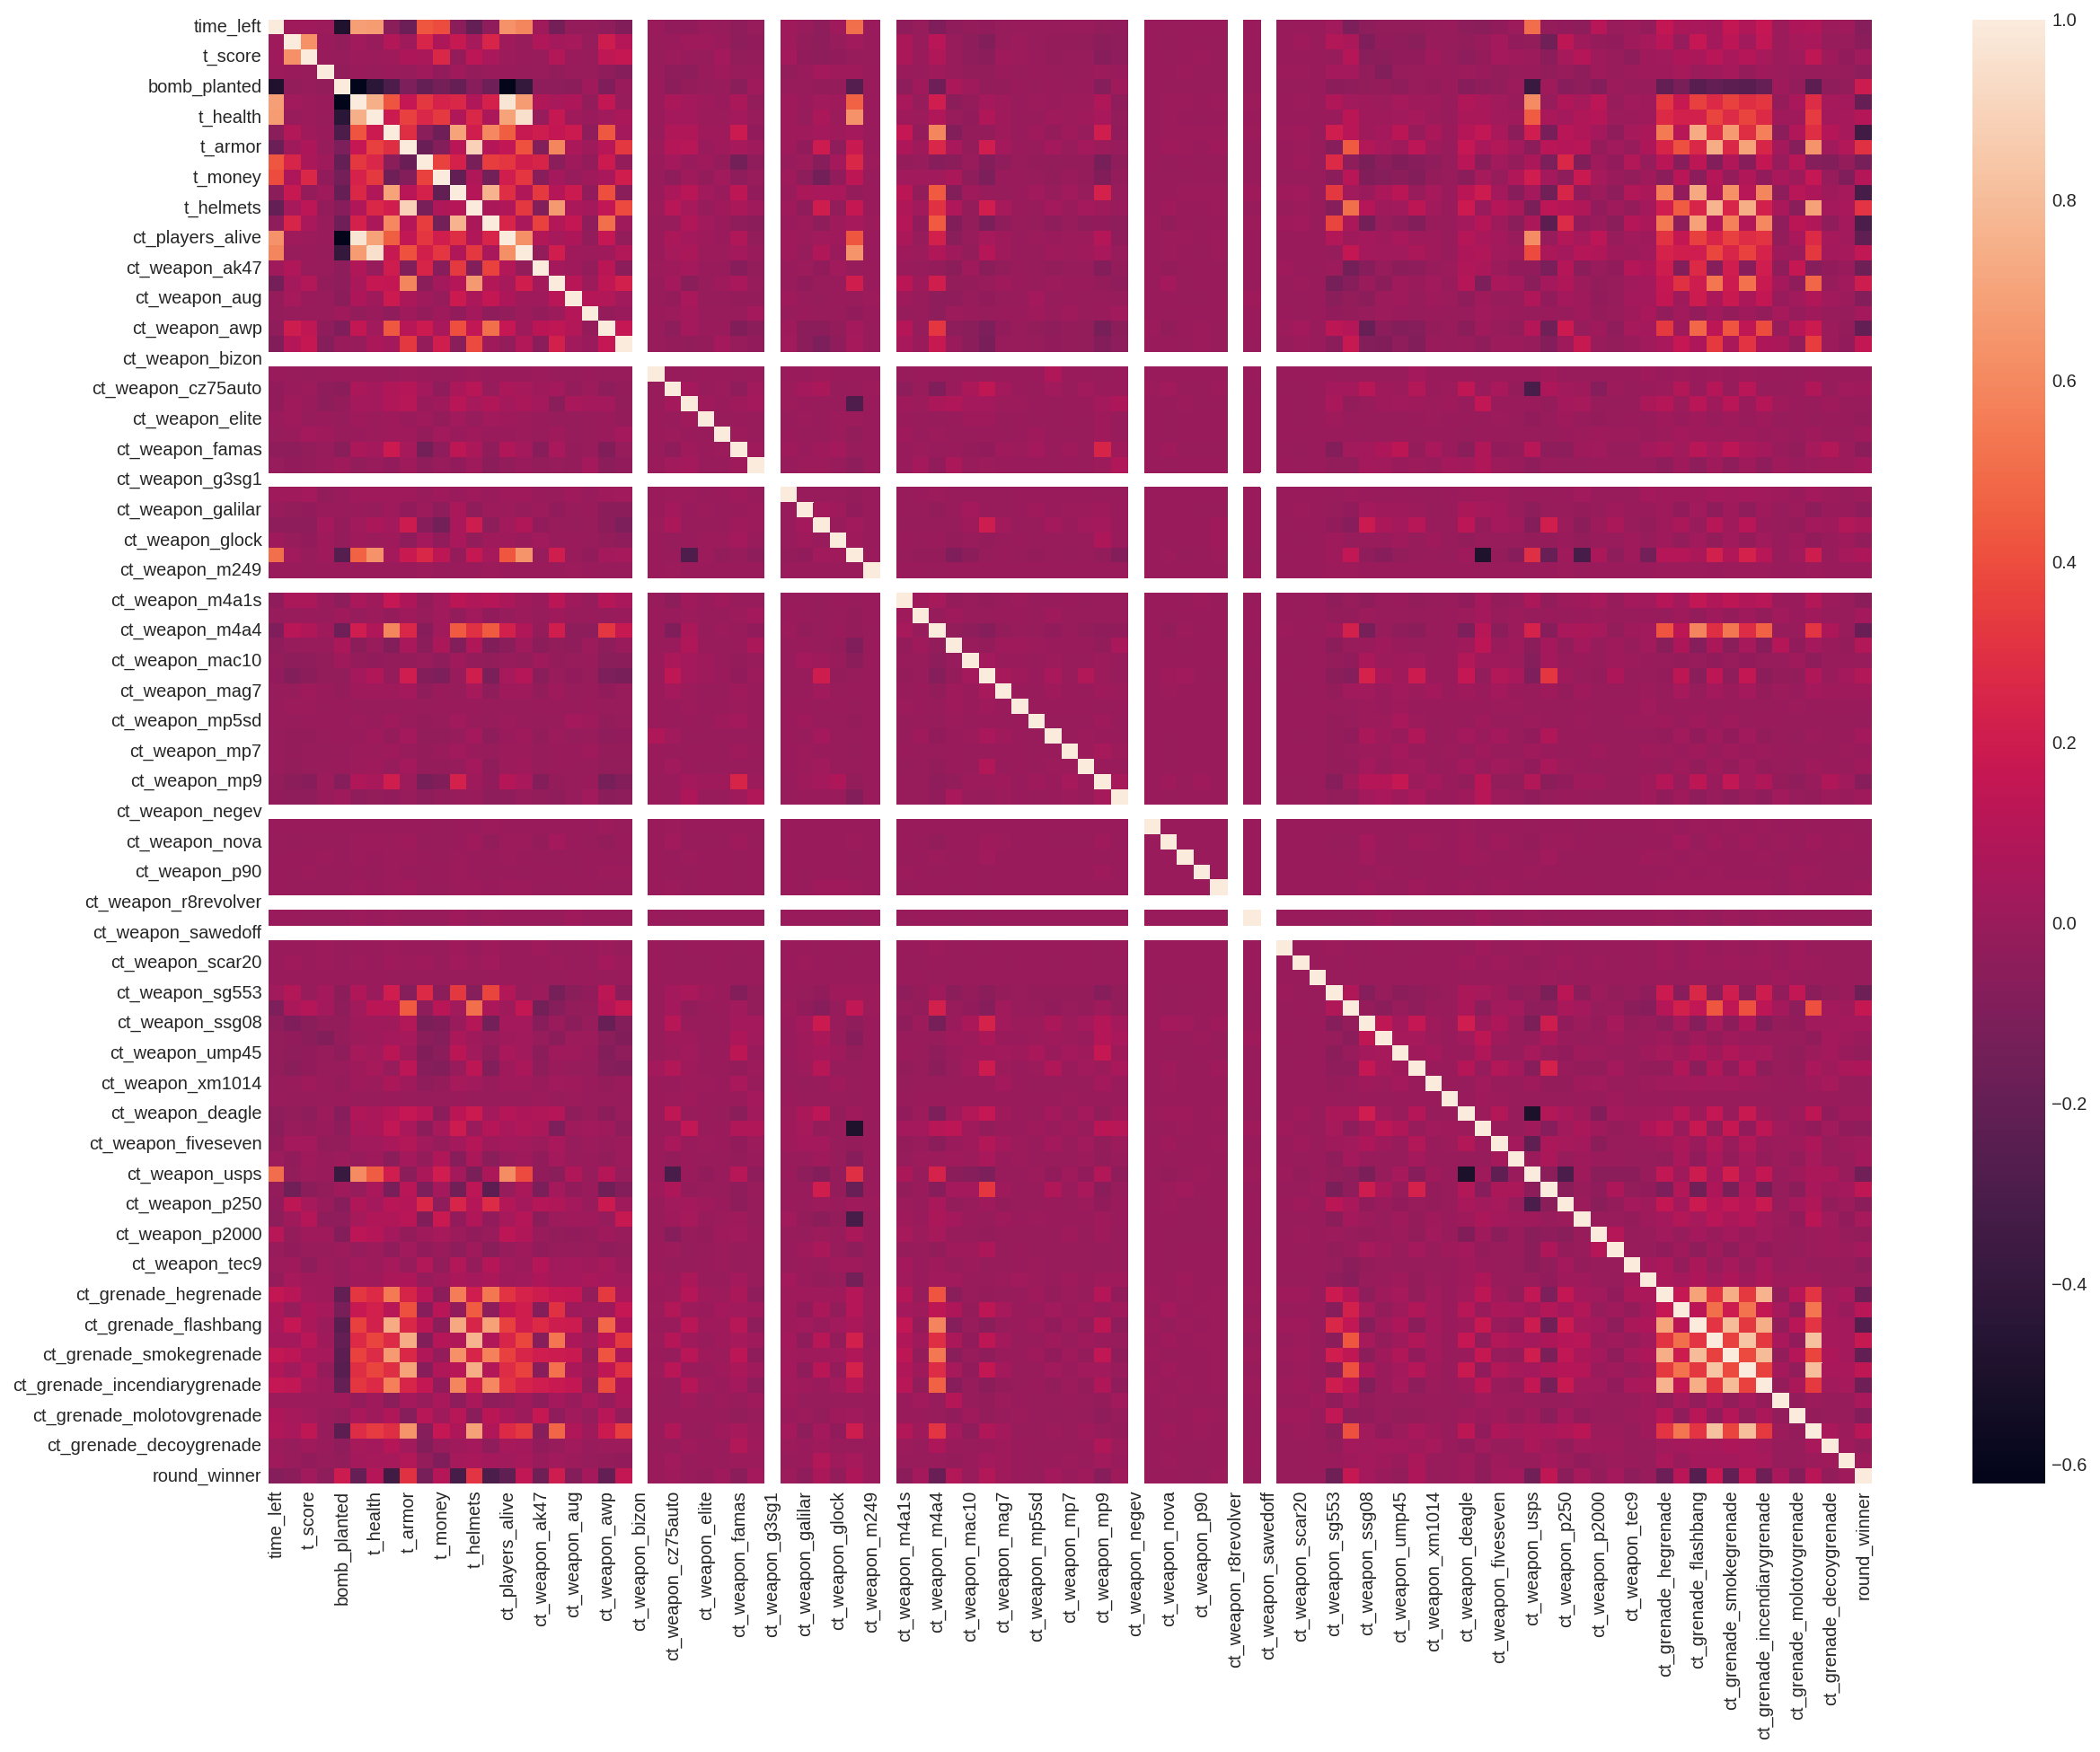

In [24]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [25]:
#checking the correlation between all the features in the data
data.corr().head()

time_left  ct_score   t_score       map  bomb_planted  \
time_left      1.000000  0.019256  0.011702  0.009349     -0.487034   
ct_score       0.019256  1.000000  0.629747 -0.000053     -0.020600   
t_score        0.011702  0.629747  1.000000 -0.005547     -0.013932   
map            0.009349 -0.000053 -0.005547  1.000000     -0.026197   
bomb_planted  -0.487034 -0.020600 -0.013932 -0.026197      1.000000   

              ct_health  t_health  ct_armor   t_armor  ct_money  ...  \
time_left      0.681461  0.673525 -0.064390 -0.173521  0.424418  ...   
ct_score       0.024748 -0.002267  0.088757  0.023988  0.247527  ...   
t_score        0.009105  0.008951  0.023156  0.072825  0.065716  ...   
map           -0.000967 -0.006786  0.003353 -0.011000  0.014725  ...   
bomb_planted  -0.616745 -0.443429 -0.296987 -0.107751 -0.199785  ...   

              t_grenade_flashbang  ct_grenade_smokegrenade  \
time_left                0.038784                 0.151979   
ct_score                 0.042539                 0.128890   
t_score                  0.113306                 0.051320   
map                      0.022635                 0.043311   
bomb_planted            -0.208201                -0.231101   

              t_grenade_smokegrenade  ct_grenade_incendiarygrenade  \
time_left                   0.075183                      0.161406   
ct_score                    0.028587                      0.146376   
t_score                     0.097498                      0.043136   
map                        -0.015453                      0.012072   
bomb_planted               -0.245254                     -0.202474   

              t_grenade_incendiarygrenade  ct_grenade_molotovgrenade  \
time_left                        0.010197                   0.071389   
ct_score                         0.007453                   0.048244   
t_score                          0.011235                   0.028763   
map                              0.005279                  -0.001524   
bomb_planted                     0.014556                  -0.024997   

              t_grenade_molotovgrenade  ct_grenade_decoygrenade  \
time_left                     0.078509                 0.011316   
ct_score                      0.054285                -0.011054   
t_score                       0.140325                 0.017125   
map                          -0.009835                -0.002059   
bomb_planted                 -0.232077                -0.034399   

              t_grenade_decoygrenade  round_winner  
time_left                   0.013931     -0.071897  
ct_score                   -0.005302     -0.057439  
t_score                    -0.027744      0.028812  
map                        -0.010189     -0.040091  
bomb_planted               -0.023669      0.191126  

[5 rows x 97 columns]

In [26]:
data.corr().unstack().sort_values().drop_duplicates().head()

bomb_planted    ct_players_alive   -0.622296
ct_health       bomb_planted       -0.616745
ct_weapon_usps  ct_weapon_deagle   -0.504927
t_weapon_glock  t_weapon_deagle    -0.490944
time_left       bomb_planted       -0.487034
dtype: float64

In [27]:

#Checking the correlation of input variables with the output variables.
data.corr()["round_winner"].sort_values(ascending=False)

round_winner                    1.000000
t_helmets                       0.312204
t_armor                         0.301770
t_weapon_ak47                   0.200281
bomb_planted                    0.191126
t_grenade_flashbang             0.171025
t_weapon_sg553                  0.166750
t_weapon_awp                    0.153175
t_players_alive                 0.147256
t_grenade_smokegrenade          0.143570
t_weapon_usps                   0.140186
t_grenade_molotovgrenade        0.118734
t_grenade_hegrenade             0.117804
t_money                         0.100731
t_health                        0.095000
t_weapon_m4a4                   0.089714
t_weapon_mac10                  0.088886
t_weapon_glock                  0.073234
t_weapon_ump45                  0.069509
t_weapon_galilar                0.064615
t_grenade_incendiarygrenade     0.050073
t_weapon_p250                   0.044782
t_weapon_fiveseven              0.038684
ct_weapon_ssg08                 0.037995
t_weapon_p2000  

In [28]:
def corrFilter(bound: float):
    xCorr = data.corr()
    data_corr_Filtered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    data_corr_Flattened = data_corr_Filtered.unstack().sort_values().drop_duplicates()
    return data_corr_Flattened
corrFilter(0.4)

ct_players_alive              bomb_planted                   -0.622296
ct_health                     bomb_planted                   -0.616745
ct_weapon_deagle              ct_weapon_usps                 -0.504927
t_weapon_glock                t_weapon_deagle                -0.490944
bomb_planted                  time_left                      -0.487034
                              t_health                       -0.443429
t_grenade_hegrenade           t_armor                         0.404775
t_grenade_smokegrenade        t_weapon_sg553                  0.406556
t_weapon_sg553                t_grenade_molotovgrenade        0.408686
t_players_alive               t_armor                         0.411025
ct_grenade_hegrenade          ct_weapon_m4a4                  0.418039
ct_armor                      ct_health                       0.418221
ct_weapon_awp                 ct_grenade_smokegrenade         0.421912
time_left                     ct_money                        0.424418
t_weap

From above graph and corr values we can see that above variables are highly correlated to round_winner(output).

Feature selection through SelectKBest model.

In [29]:

# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
     

# Create feature and target variable for Classification problem
X_clf=data.drop('round_winner', axis=1) # features
y_clf=data['round_winner'] # Target variable

In [30]:
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [31]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
# Create and fit selector
selector = SelectKBest(f_classif, k=20)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [32]:
features_df_new.head()

bomb_planted  ct_health  ct_armor  t_armor  ct_helmets  t_helmets  \
0             0        500         0        0           0          0   
1             0        500       400      300           0          0   
2             0        391       294      200           0          0   
3             0        391       294      200           0          0   
4             0        500       192        0           0          0   

   ct_defuse_kits  ct_players_alive  ct_weapon_ak47  t_weapon_ak47  \
0               0                 5               0              0   
1               1                 5               0              0   
2               1                 4               0              0   
3               1                 4               0              0   
4               1                 5               0              0   

   ct_weapon_awp  ct_weapon_m4a4  ct_weapon_sg553  t_weapon_sg553  \
0              0               0                0               0   
1              0               0                0               0   
2              0               0                0               0   
3              0               0                0               0   
4              0               0                0               0   

   ct_weapon_usps  ct_grenade_hegrenade  ct_grenade_flashbang  \
0               4                     0                     0   
1               4                     0                     0   
2               4                     0                     0   
3               4                     0                     0   
4               4                     0                     0   

   t_grenade_flashbang  ct_grenade_smokegrenade  ct_grenade_incendiarygrenade  
0                    0                        0                             0  
1                    0                        0                             0  
2                    0                        0                             0  
3                    0                        0                             0  
4                    0                        0                             0

Indentifying predictor Significance for the SelectKBest model.



In [33]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data['round_winner'],features_df_new ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          1.073e+04
Date:                Fri, 03 Feb 2023   Prob (F-statistic):                        0.00
Time:                        12:31:08   Log-Likelihood:                         -66128.
No. Observations:              117448   AIC:                                  1.323e+05
Df Residuals:                  117428   BIC:                                  1.325e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bomb_planted                     0.3911      0.004     96.734      0.000       0.383       0.399
ct_health                       -0.0002   3.98e-05     -6.061      0.000      -0.000      -0.000
ct_armor                        -0.0008   1.37e-05    -60.725      0.000      -0.001      -0.001
t_armor                          0.0010   1.73e-05     60.051      0.000       0.001       0.001
ct_helmets                      -0.0117      0.001     -8.941      0.000      -0.014      -0.009
t_helmets                        0.0426      0.002     21.561      0.000       0.039       0.046
ct_defuse_kits                  -0.0132      0.001     -9.060      0.000      -0.016      -0.010
ct_players_alive                 0.1132      0.004     27.524      0.000       0.105       0.121
ct_weapon_ak47                  -0.0164      0.002     -6.738      0.000      -0.021      -0.012
t_weapon_ak47                    0.0268      0.002     16.639      0.000       0.024       0.030
ct_weapon_awp                   -0.0381      0.002    -16.743      0.000      -0.043      -0.034
ct_weapon_m4a4                  -0.0269      0.002    -17.889      0.000      -0.030      -0.024
ct_weapon_sg553                 -0.0236      0.003     -9.247      0.000      -0.029      -0.019
t_weapon_sg553                   0.0362      0.002     21.464      0.000       0.033       0.040
ct_weapon_usps                   0.0061      0.001      5.571      0.000       0.004       0.008
ct_grenade_hegrenade             0.0003      0.002      0.168      0.867      -0.003       0.003
ct_grenade_flashbang            -0.0089      0.002     -5.836      0.000      -0.012      -0.006
t_grenade_flashbang             -0.0415      0.001    -34.038      0.000      -0.044      -0.039
ct_grenade_smokegrenade         -0.0024      0.001     -1.641      0.101      -0.005       0.000
ct_grenade_incendiarygrenade     0.0132      0.002      8.147      0.000       0.010       0.016
==============================================================================
Omnibus:                    19274.934   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4282.384
Skew:                          -0.008   Prob(JB):                         0.00
Kurtosis:                       2.065   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.26e+03. This might indicate that there are
stro

By using SelectKbest method we got above variables as predictable variables.

Feature Importance

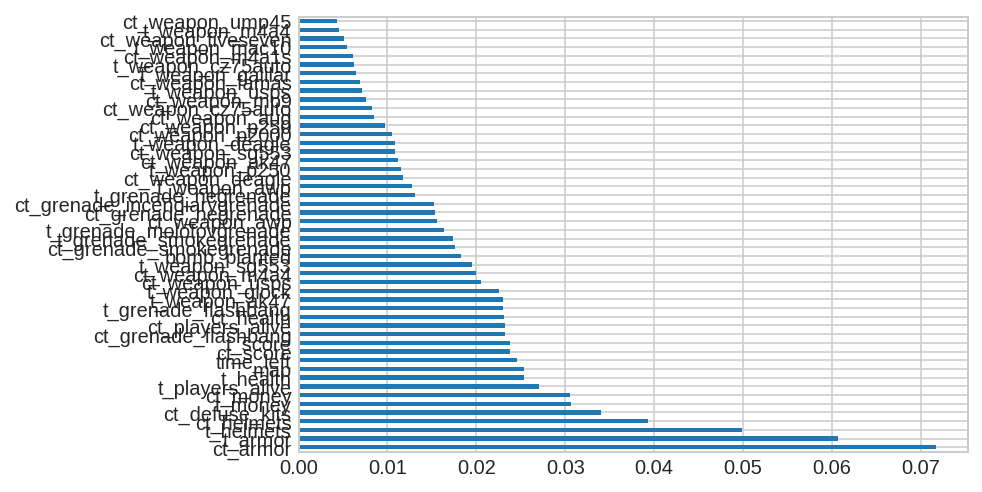

In [34]:
y = data['round_winner']
x = data.drop('round_winner', axis=1)
model = ExtraTreesClassifier()
model.fit(x,y)
#print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

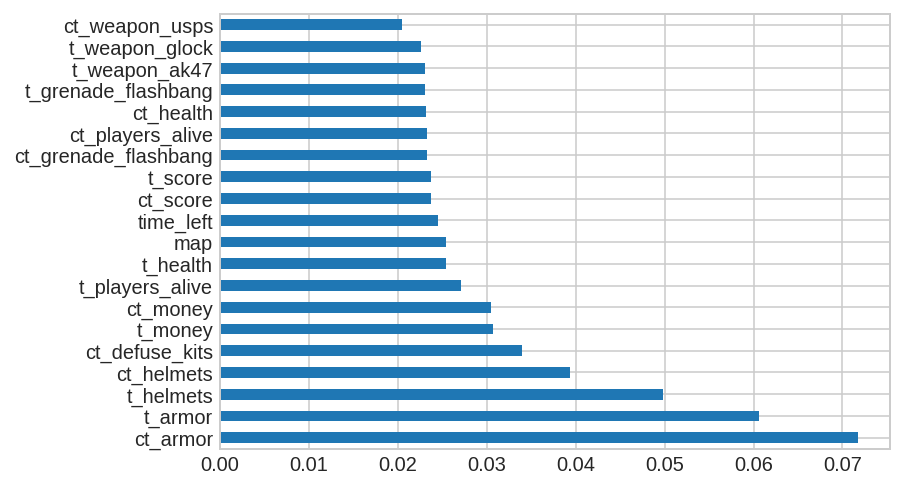

In [35]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

## Which predictor variables are the most important?

looking at the feature selection methods,

armors, 

helmets,

defuse kits, 

money, 

players alive, 

health, 

map, 

time left, 

scores up to that point, 

flashbang grenades, and 

weapons like ak47, Glock, and usps 

are given under the top 20 ranking, but looking at the total data and gameplay next 30 features are very close to each other based on there rankings. CSGO is an unpredictive game.

## In the predictor variables independent of all the other predictor variables?

Yes, all the predictor variables are independent of the other predictor variables. 

Weapons and grenades can be bought by the player with the money they have or teammates can drop/donate them. Every round minimum money is provided to each player irrespective of the win or loss. with which they can buy armor, helmets, and defuse kits. It comes to the decision made by the player

From personal experience from playing this game, the game is unpredictable and sometimes teamwork will triumph, sometimes not, sometimes the team with the most money wins, and sometimes the team which the player with no armor or helmets may win. Even though armor, helmets, defuse kits, money, and players alive are shown to be more important in the feature selection methods, From looking at the data most of the features(85%) are important to predict the output they just fall a little behind in feature importance rankings.

## Do the training and test sets have the same data?

No, the training data and the test data are not same.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Training and Evaluation

In [37]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     11488
           1       0.74      0.77      0.76     12002

    accuracy                           0.74     23490
   macro avg       0.74      0.74      0.74     23490
weighted avg       0.74      0.74      0.74     23490



In [38]:
model_2 = DecisionTreeClassifier()
model_2.fit(x_train,y_train)
pred_2 = model_2.predict(x_test)
cr2 = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     11488
           1       0.82      0.82      0.82     12002

    accuracy                           0.82     23490
   macro avg       0.82      0.82      0.82     23490
weighted avg       0.82      0.82      0.82     23490



In [39]:
model_3 = RandomForestClassifier()
model_3.fit(x_train,y_train)
pred_3 = model_3.predict(x_test)
cr3 = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     11488
           1       0.89      0.86      0.88     12002

    accuracy                           0.88     23490
   macro avg       0.88      0.88      0.88     23490
weighted avg       0.88      0.88      0.88     23490



In [40]:
model_4 = XGBClassifier()
model_4.fit(x_train,y_train)
pred_4 = model_4.predict(x_test)
cr4 = classification_report(y_test,pred_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     11488
           1       0.80      0.73      0.76     12002

    accuracy                           0.77     23490
   macro avg       0.77      0.77      0.77     23490
weighted avg       0.77      0.77      0.77     23490



In [41]:
model_5 = MLPClassifier()
model_5.fit(x_train,y_train)
pred_5 = model_5.predict(x_test)
cr5 = classification_report(y_test,pred_5)
print(cr5)

              precision    recall  f1-score   support

           0       0.75      0.38      0.51     11488
           1       0.60      0.88      0.71     12002

    accuracy                           0.64     23490
   macro avg       0.68      0.63      0.61     23490
weighted avg       0.67      0.64      0.61     23490



In [42]:
print('Optimal accuracy for random forest classifier:', str(accuracy_score(y_test,pred_3)*100) + '%')

Optimal accuracy for random forest classifier: 87.53937845891869%


With outliers

Optimal accuracy for random forest classifier: 87%


## Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Removing Outliers

In [43]:
data2=data
Q1 = data2.quantile(0.05)
Q3 = data2.quantile(0.95)
#IQR = Q3 - Q1 I tried IQR method but it's returing me with nan, so I opted manually 
#to remove outliers less than 5 persentile and more than 95 percentile.

#data2 = data2[~((data2 < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data2 = data2[~((data2 < (Q1)) |(data2 > (Q3))).any(axis=1)]

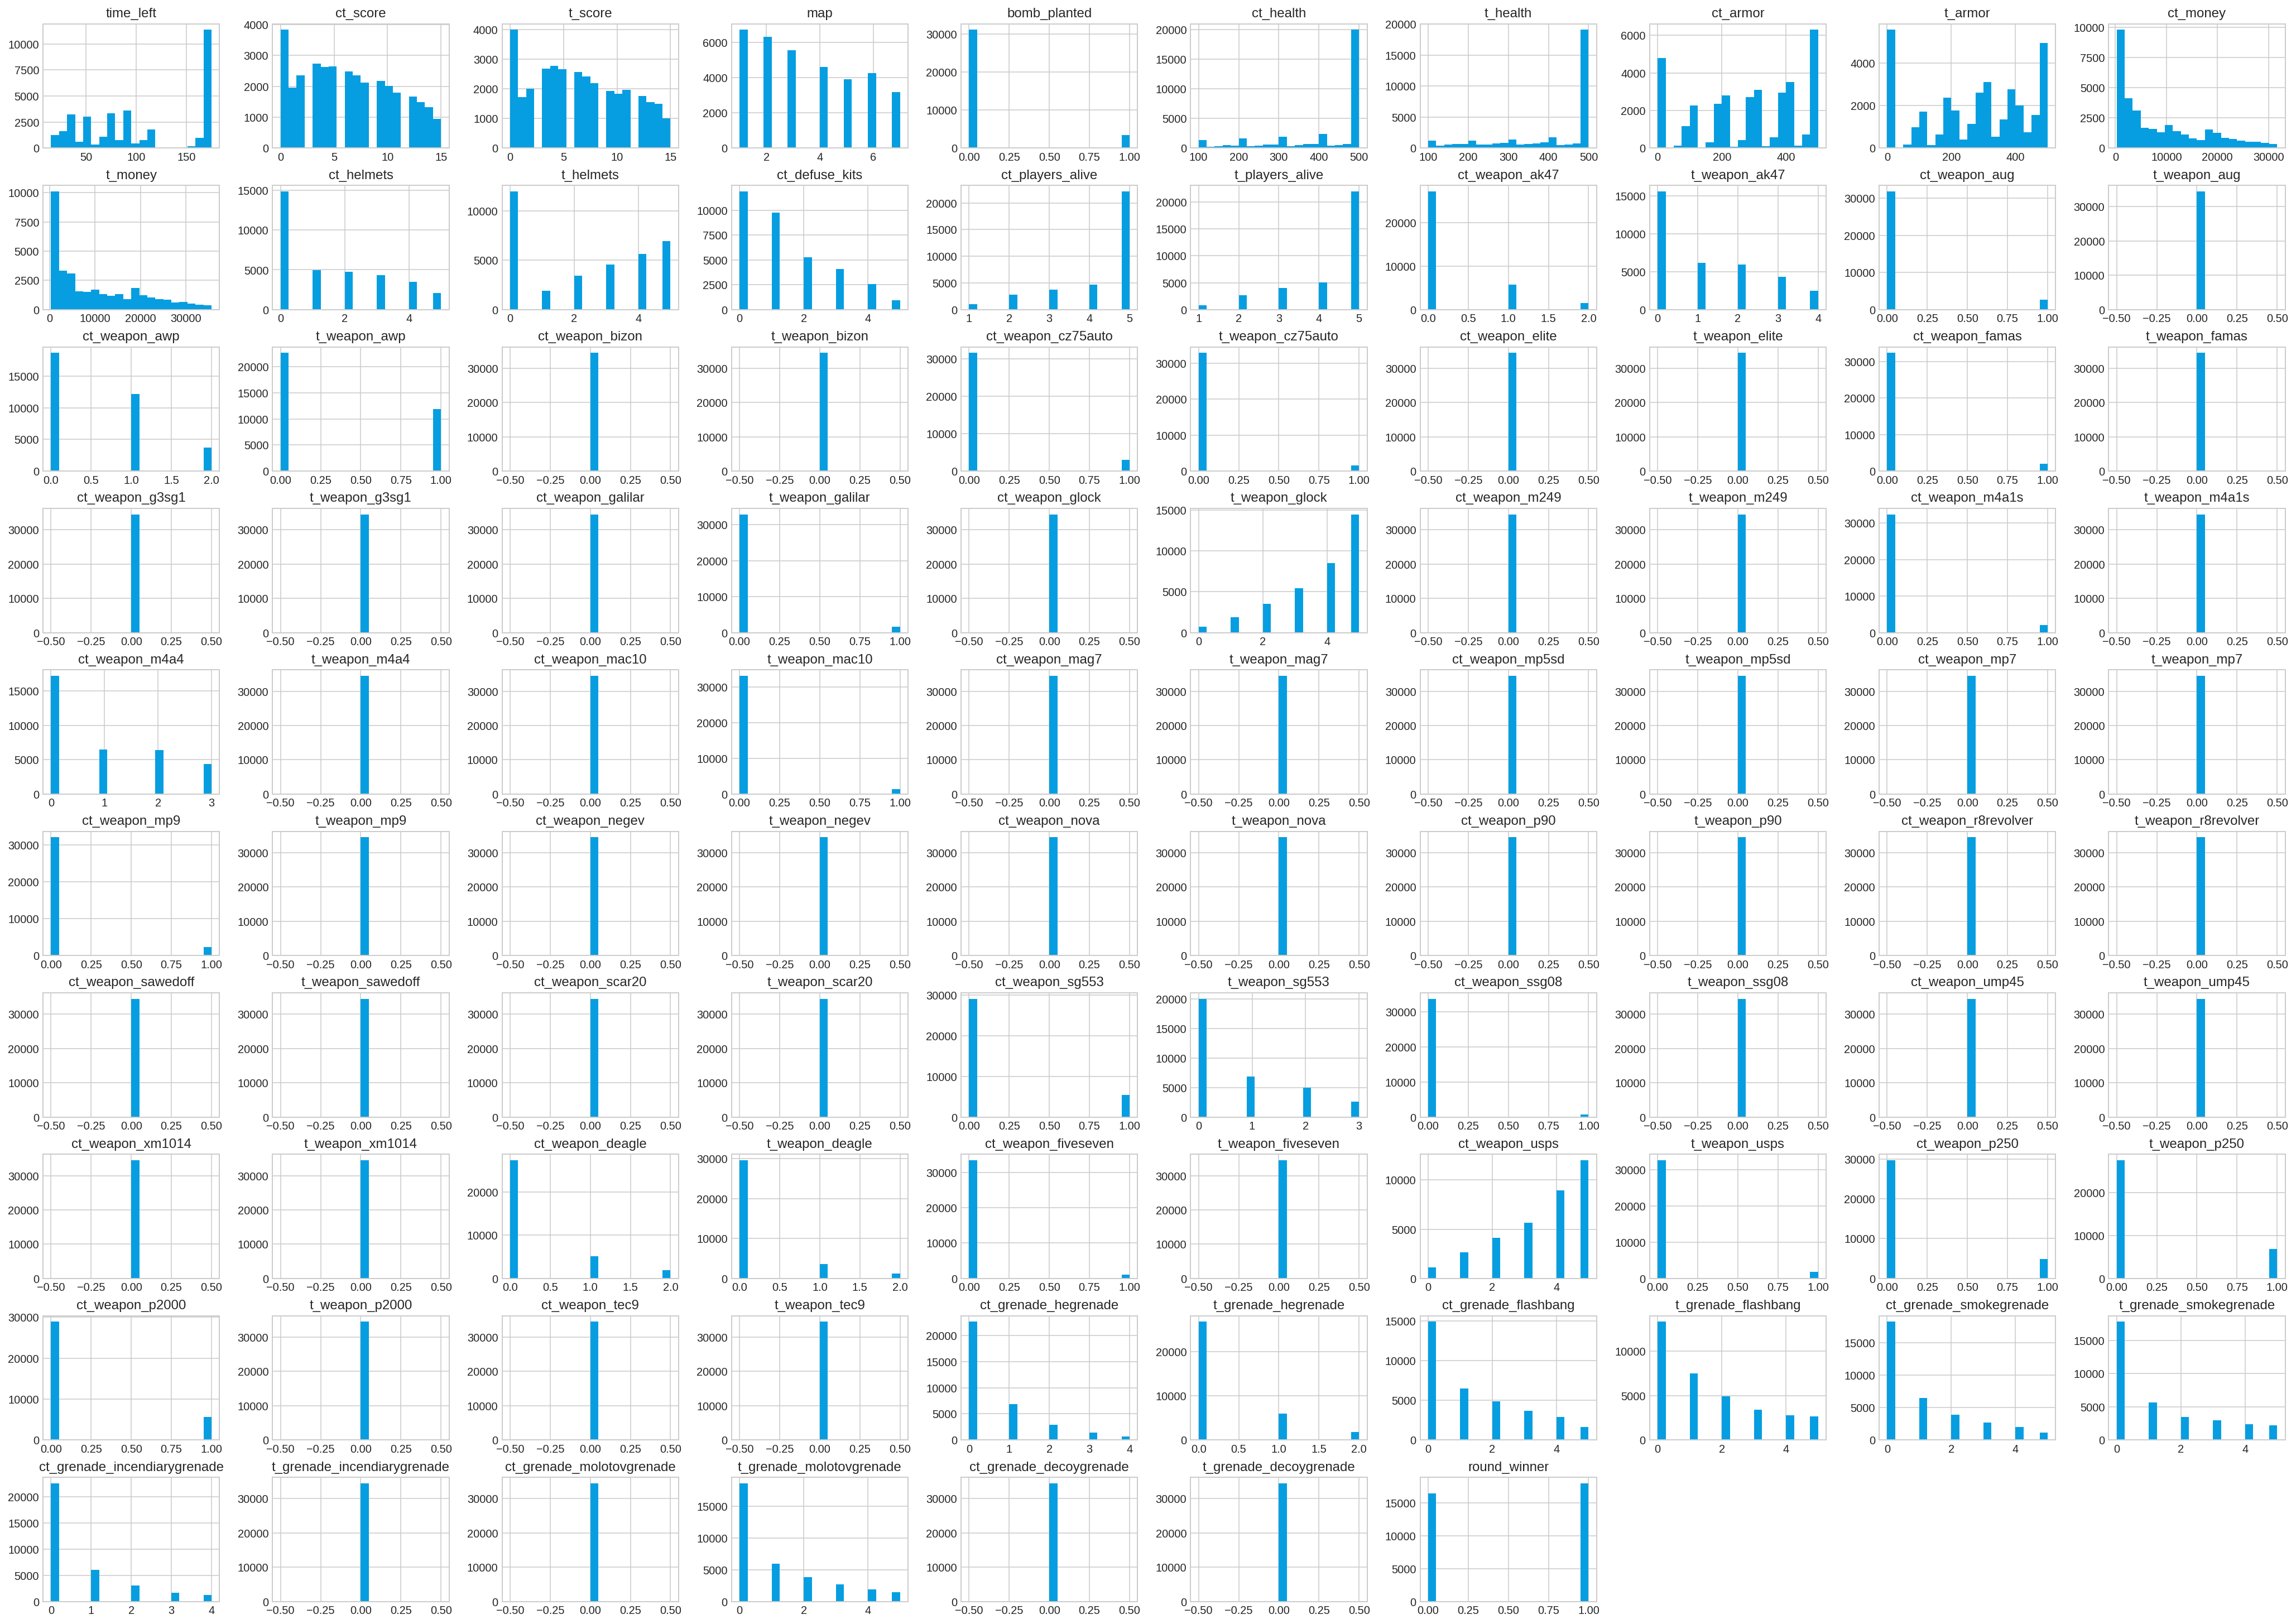

In [44]:
plt.style.use('seaborn-whitegrid')

data2.hist(bins=20, figsize=(36,26), color='#069EE1')
plt.show();

So we have created two pds from dataset tey are data and data2, I have removed the outliers for data2 while I didn't for data.

In [45]:
logisticRegr = LogisticRegression()
y1 = data['round_winner']
X1 = data.drop('round_winner', axis=1)
#splitting data in to train and test, 20% of data will be used for testing
#stratify for sorting 
#fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
logisticRegr.fit(X1_train_data, y1_train_data)
#The output of a Logistic regression model is a probability. We can select a threshold value. 
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 0.5
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X1_test_data)

array([1, 1, 1, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import r2_score, mean_squared_error
Z = logisticRegr.predict(X1_test_data)
rms = mean_squared_error(y1_test_data, Z , squared=False);
rms

0.5090496491880158

In [47]:

logisticRegr.score(X1_test_data, y1_test_data)

0.7408684546615582

So for data(with outliers) the accuracy is 74%

In [48]:
y2 = data2['round_winner']
X2 = data2.drop('round_winner', axis=1)
#splitting data into train and test, 20% of data will be used for testing
#stratify for sorting 
#fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
logisticRegr.fit(X2_train_data, y2_train_data)
#The output of a Logistic regression model is a probability. We can select a threshold value. 
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 0.5
#setting a threshold of 0.5 will be the ideal case
logisticRegr.predict(X2_test_data)

array([1, 1, 1, ..., 1, 1, 0])

In [49]:
Z2 = logisticRegr.predict(X2_test_data)
rms = mean_squared_error(y2_test_data, Z2 , squared=False);
rms

0.5266795081905372

In [50]:
logisticRegr.score(X2_test_data, y2_test_data)

0.7226086956521739

In Logistic Regression,

So for data2(without outliers) the accuracy is 72.1%.
the data with outliers is better for prediction model than the data without outliers.

In [51]:
X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
model_3 = RandomForestClassifier()
model_3.fit(X2_train_data,y2_train_data)
pred_3 = model_3.predict(X2_test_data)
cr3 = classification_report(y2_test_data,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3294
           1       0.86      0.85      0.85      3606

    accuracy                           0.85      6900
   macro avg       0.85      0.85      0.85      6900
weighted avg       0.85      0.85      0.85      6900



Even when you compare accuracy for random forest classifier: Around 87%(with outliers)
and accuracy for random forest classifier: Around 85%(without outliers)

Some datasets need the outliers to perform better.

## References:


https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification/code

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://machinelearningmastery.com/calculate-feature-importance-with-python/


https://www.digitalocean.com/community/tutorials/normalize-data-in-python

https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html

https://www.statology.org/confusion-matrix-python/#:~:text=Logistic%20regression%20is%20a%20type,values%20from%20the%20test%20dataset.
